## <h1><center>  <font color='maroon'> “Time Series Analysis” to Forecast Crashes and Traffic Violations in Montgomery County, MD </font> </center></h1>


### DATA 205 – Capstone project
### by Meenakshi Nerolu     


### Table of Contents
* <b>[Data Understanding and Preparation](#sec1)</b>
    * [Datasets](#subsec_1_1)
    * [Questions to Research ](#subsec_1_2)
        * [Stage I](#subsec_1_2_1)
        * [Stage II](#subsec_1_2_2)
    * [Packages Used](#subsec_1_3)
* <b>[Traffic Violation](#sec2)</b>
    * [Reading "Traffic_Violations" data](#subsec_2_1)  
         * [Data Cleaning and Wrangling](#subsec_2_1_1)  
    * [Exploratory Data Analysis and Visualization](#subsec_2_2)
* <b> [Machine Learning Model](#sec2a) </b>
* <b>[Crash Reporting Incidents Data](#sec3)</b>
    * [Reading data](#subsec_3_1)
        * [Cleaning Data](#subsec_3_1_1)  
* <b>[Crash Reporting – Non-Motorists Data](#sec4)</b>
    * [Reading data](#subsec_4_1)
        * [Cleaning Data](#subsec_4_1_1) 
* <b>[Exploratory Data Analysis and Visualization (Motorists and Non-Motorists)](#sec5)</b>     
* <b>[Time Series Analysis (Motorists)](#sec6)</b>
* <b>[Acknowledgement](#sec7)</b>    

# Data Understanding and Preparation <a class="anchor" id="sec1"></a>

The objective of the project is to examine five datasets from [dataMontgomery](https://data.montgomerycountymd.gov/). Two of the data sets is related to Covid-19 and other two is related to crash reporting data. Also, Traffic Violation is considered in the project.

## Data Sets <a class="anchor" id="subsec_1_1"></a>

<b> Trafic Violation  :  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q" URL> [Trafic Violation data]<!-- link to site --> </b>

> This dataset is updated daily and provides traffic violation information from all electronic traffic violations issued in the County.


<b> Crash Report :</b>

1.  <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf" URL> [Crash Reporting Incident data]<!-- link to site -->
    
2. <a href = "https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5" URL> [Crash Reporting-Non-Motorists data]<!-- link to site -->
    
    ## Questions to Research <a class="anchor" id="subsec_1_2"></a>

## Stage I <a class="anchor" id="subsec_1_2_1"></a>


<b>Dataset: </b> Traffic Violation
* How does number of violations change over year, month and season? Which month has the highest number of violations? Are    they consistent? 
* What days of the week had the highest number of violations and how do they change over the years?
* Who (race and gender) got the highest number of tickets? 
* Which color of the vehicle have the highest number of violations and did they contribute to accident?

<b>Dataset: </b> Crash Report (Motorists and Non-Motorists)
* How does number of crashes change over year, month and season? Which month has the highest number of violations? Are    they consistent?
* What days of the week had the highest number of crashes and how do they change over the years?
* What damage was caused due to the crash?
* What is the weather, surface and light conditiona when the most crashes occurred?



## Stage II <a class="anchor" id="subsec_1_2_2"></a>

### <b> Modeling and Interpretation </b> 
* Can we predict the following with a Machine Learning Model :
	* Binomial Classification:
		* Drivers that are male?
		* Violation that cased Personal Injury?
		* Violation Contributed to Accident ?
	* Multinominal Classification:
		* Violation Type?
        
### <b> Time-Series Analysis and Forecasting Number of Crashes</b> 

# Packages Used <a class="anchor" id="subsec_1_3"></a>

### Data Wrangling
* **Numpy :** library meant for numerical computation
* **Pandas :** library for data manipulation and analysis

### Data Visualization
* **matplotlib :** 2D-plotting library
* **Seaborn :** data visualization library
* **geoplotlib :** visualizing geographical data
* **plotly**

### Machine Learning and Time Series
* Scikitlearn
* fbprophet

In [1]:
## import packages:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import pandas.util.testing as tm
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly as py
import pylab as pl
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools

#sklearn
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import resample
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn import preprocessing
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt

#Time-Series Analysis
import time
import datetime 
import dateutil
import statsmodels.api as sm
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from fbprophet.plot import add_changepoints_to_plot
from plot_metric.functions import BinaryClassification

from termcolor import colored
pl.rcParams['figure.figsize'] = (8, 8)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 1.Traffic Violation <a class="anchor" id="sec2"></a> 

## Reading "Traffic_Violation" data <a class="anchor" id="subsec_2_1"></a>

Traffic Violation Data is downloaded from the url and hence is up-to-date.

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)

    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [3]:
traffic.shape

(1693788, 43)

## Data Cleaning and Wrangling<a class="anchor" id="subsec_2_1_1"></a>

In the below coding, a function "useFeatures(traffic)" is defined and the following filters are done :

* Date and Time columns are converted to datetime format.
* New columns, viz., year, month, time, hour, week day and season are included.
* A new column *Violation* is included for counting purpose

In [4]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    #traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    traffic['day'] = traffic['DateOfStop'].dt.day_name()
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'12/01/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

All the above features are stored in new data frame *traffic_features*.


In [5]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

Text(0.5, 0.9, 'Missing values By Variable')

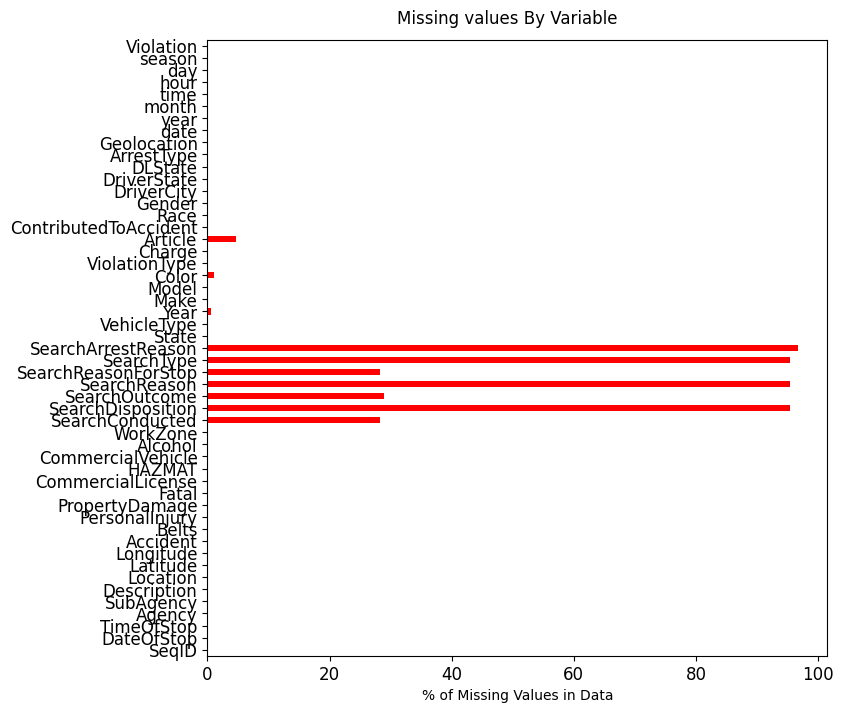

In [97]:
    missing_var = 100*traffic_features.isnull().sum()/traffic_features.shape[0]
    missing_var.sort_values()
   # print(100*traffic_features.isnull().sum()/traffic_features.shape[0]) #missing_var2.index
    plot = missing_var.plot(kind='barh',figsize=(8,8), grid = False,label="Percentage",color='red',fontsize=12)
    plot.set_xlabel("% of Missing Values in Data")
    plt.figtext(.5,0.9,'Missing values By Variable',fontsize=12,ha='center')

All 'Search' related variables have highest missing values and I dropped these columns. Further, features with 'Yes' and 'No' is replaced by binary number.

### Replace Yes or No by 0 

In [7]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
   
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [8]:
traffic_new["Color"].value_counts()

BLACK          240027
SILVER         207108
WHITE          182930
GRAY           136996
RED             85330
BLUE            80796
GREEN           31595
GOLD            30917
BLUE, DARK      24114
TAN             19433
MAROON          17478
BLUE, LIGHT     13211
BEIGE           10991
GREEN, DK        9649
GREEN, LGT       5321
BROWN            4676
YELLOW           3977
ORANGE           3721
BRONZE           2414
PURPLE           1944
MULTICOLOR        760
CREAM             546
COPPER            347
PINK              148
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

Color of the car, viz., Green Lgt, Green dk etc. are repaced by standard colors like Green, Blue etc.

In [9]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1126056, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126056 entries, 0 to 1126055
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 361.9+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


All other NA's are replaced by 0.

### Grouping the time to determine the rush hour traffic.

In order to analyze the rush hour traffic, hours is categorized as follows: 
* "Morning Rush (6-10)", 
* "Day (10-12)", 
* "Lunch Rush (12-14)",
* "Afternoon (14-16)",
* "Evening" Rush (16-18)", 
* "Evening (18-22)",
* "Night (22-6)"

In [10]:
traffic_new['Rush_time']=traffic_new['TimeOfStop'].dt.hour
#create Rush Time by grouping

def rushhour(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [11]:
#apply function   
traffic_new['Rush_time']= traffic_new['Rush_time'].apply(rushhour)

In [12]:
#traffic_final = traffic_new.fillna(method='ffill')
traffic_final = traffic_new.fillna(0)
traffic_final .head()

DateOfStop          TimeOfStop Agency                            SubAgency  \
0 2015-01-01 2020-12-09 00:14:00    MCP          3rd District, Silver Spring   
1 2015-01-01 2020-12-09 15:47:00    MCP  Headquarters and Special Operations   
2 2015-01-01 2020-12-09 22:52:00    MCP              1st District, Rockville   
3 2015-01-01 2020-12-09 03:55:00    MCP             5th District, Germantown   
4 2015-01-01 2020-12-09 04:16:00    MCP  Headquarters and Special Operations   

                                         Description  \
0  DRIVER FAIL TO STOP AT RED TRAFFIC SIGNAL BEFO...   
1  FAILURE TO SECURELY FASTEN REGISTRATION PLATE ...   
2    DRIVING ON HWY. WITH OBSTRUCTED WINDSHIELD VIEW   
3  DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...   
4      DRIVING UNDER THE INFLUENCE OF ALCOHOL PER SE   

                             Location   Latitude  Longitude  Accident  Belts  \
0      BROADBIRCH DR / CHERRY HILL RD  39.051242 -76.952867         0      0   
1                    S/B 270 @ RT 109  39.273398 -77.318857         0      0   
2         ROCKVILLE PIKE/TEMPLETON PL  39.068198 -77.129210         0      0   
3                   118 @ WISTERIA DR  39.175293 -77.272070         0      0   
4  MUDDY BRANCH RD @ GREAT SENECA HWY  39.118850 -77.216872         0      0   

   ...                            Geolocation       date  year  month  \
0  ...  (39.0512416666667, -76.9528666666667) 2015-01-01  2015      1   
1  ...  (39.2733983333333, -77.3188566666667) 2015-01-01  2015      1   
2  ...          (39.0681983333333, -77.12921) 2015-01-01  2015      1   
3  ...          (39.1752933333333, -77.27207) 2015-01-01  2015      1   
4  ...          (39.11885, -77.2168716666667) 2015-01-01  2015      1   

       time  hour       day  season Violation  Rush_time  
0  00:14:00     0  Thursday  Winter         1      Night  
1  15:47:00    15  Thursday  Winter         1  Afternoon  
2  22:52:00    22  Thursday  Winter         1      Night  
3  03:55:00     3  Thursday  Winter         1      Night  
4  04:16:00     4  Thursday  Winter         1      Night  

[5 rows x 44 columns]

In [13]:
#obj_traffic_new = traffic_final.select_dtypes(include=['object']).copy()
#obj_traffic_new.head()
#traffic_new[obj_traffic_new]=traffic_new[obj_traffic_new].fillna("other")
#traffic_new = traffic_new.fillna("")
#traffic_new.head()

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [14]:
is_2020 = traffic_final['year']==2020
is_2019 = traffic_final['year'] != 2020
#Creating Dataframe only for the year 2020
traffic_final_2020 = traffic_final[is_2020]
#Data from 2015- 2019
traffic_final_2019 = traffic_final[is_2019]
print("Size of the original data frame:", traffic_final.shape)
print("Size of the original data frame from 2015-2019:", traffic_final_2019.shape)
print("Size of the original data frame for the year 2020:", traffic_final_2020.shape)

Size of the original data frame: (1126056, 44)
Size of the original data frame from 2015-2019: (1061185, 44)
Size of the original data frame for the year 2020: (64871, 44)


## EDA principles and the Matplotlib packages to visualize the data <a class="anchor" id="subsec_2_2"></a>

## Questions to Research 
### Question 1 : How does number of violations change over year, month and season? Which month has the highest number of violations? Are they consistent?

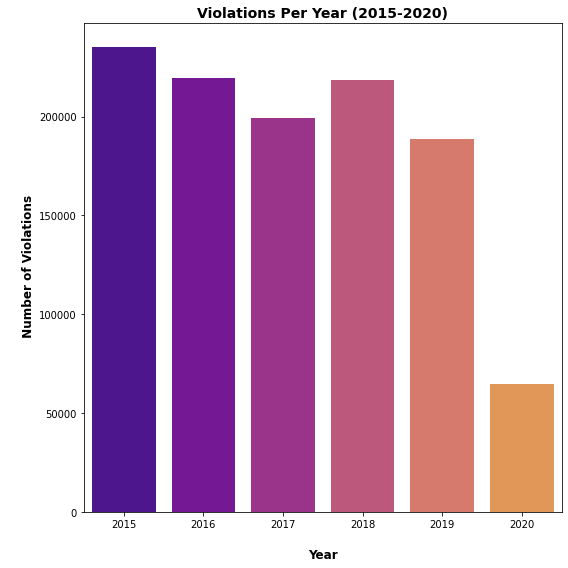

In [15]:
violationperyear = traffic_final.groupby(['year'])['Violation'].count()

# sns barplot
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
sns.barplot(violationperyear.index,violationperyear.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Year (2015-2020)",fontsize=14, fontweight="bold")
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.savefig('images/violationperyear.jpg')
plt.tight_layout()

Minor variations on a yearly basis is expected. A significant drop in the number of violation in 2020 can be attributed to decrease in traffic due to the pandemic.

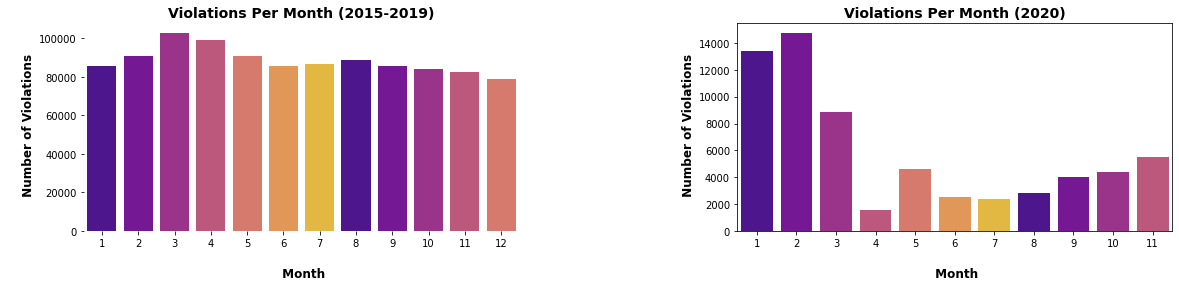

In [16]:
violationpermonth = traffic_final_2019.groupby(['month'])['Violation'].count()
violationpermonth_2020 = traffic_final_2020.groupby(['month'])['Violation'].count()
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(violationpermonth.index,violationpermonth.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Month (2015-2019)",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(violationpermonth_2020.index,violationpermonth_2020.values, palette=colors)
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.title("Violations Per Month (2020)",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.savefig('images/violationpermonth.jpg')

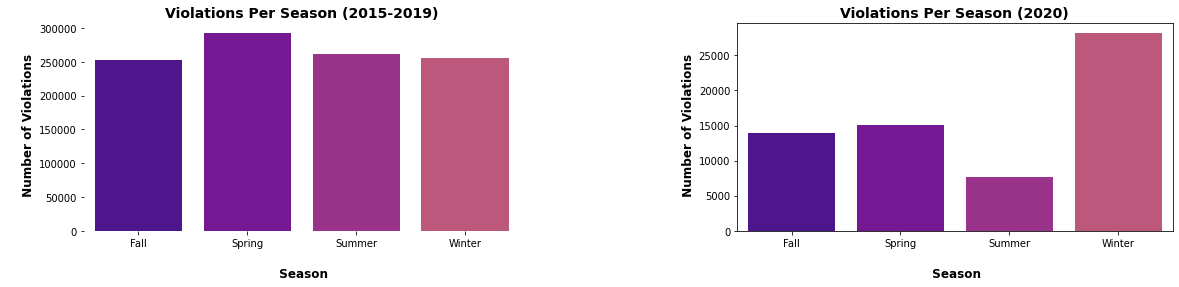

In [17]:
violationperseason = traffic_final_2019.groupby(['season'])['Violation'].count()
violationperseason_2020 = traffic_final_2020.groupby(['season'])['Violation'].count()
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(violationperseason.index,violationperseason.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Violations Per Season (2015-2019)",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(violationperseason_2020.index,violationperseason_2020.values, palette=colors)
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.title("Violations Per Season (2020)",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")
plt.savefig('images/violationpermonth.jpg')

When I looked into the variation of number of violations with month/season, noticed that Spring season had highest number from 2015-2019, where as in the winter it is high in the year 2020.

## Question 2 : What days of the week had the highest number of violations and how do they change over the years?

To answer this, heatmap visualization is used.

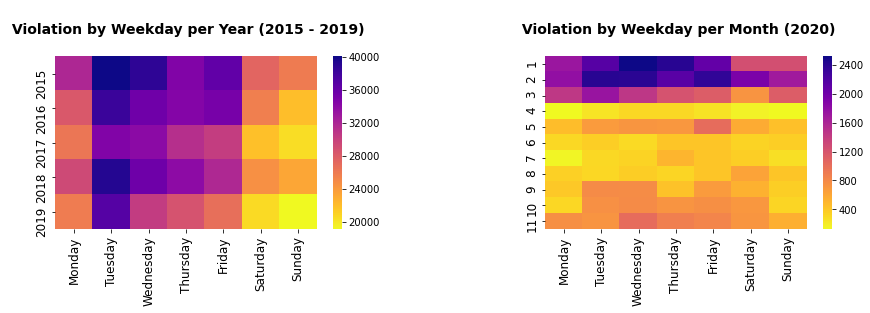

In [18]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_final_2019.groupby(['year', 'day']).size()
violationweekday_2020 = traffic_final_2020.groupby(['month', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
violationweekday_2020 = violationweekday_2020.rename_axis(['month', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
#plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year (2015 - 2019)\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.subplot(1, 2, 2)
sns.heatmap(violationweekday_2020, cmap='plasma_r')
plt.title('\n Violation by Weekday per Month (2020)\n', fontsize=14, fontweight='bold')
plt.subplots_adjust(left=0.11, bottom=0.1, right=2, top=0.7, wspace=0.5, hspace=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear.jpg')
plt.show()

From 2015-2019, it is observed that Tuesday had highest number of violation. In 2020, we can see highest number in January-March. 

### Rush-hour Traffic

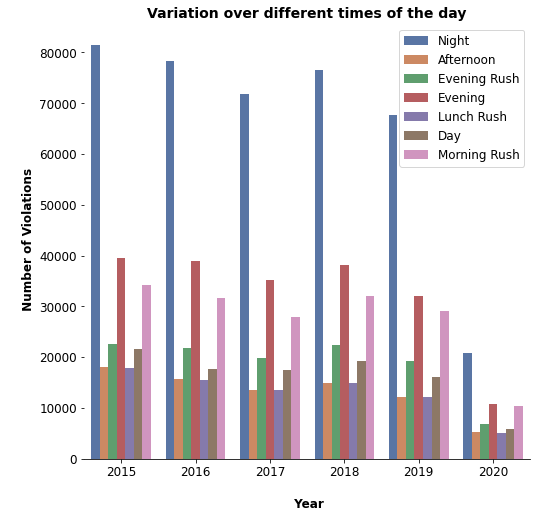

In [19]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(8,8))
ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=traffic_final)

#plt.style.use('classic')
plt.title("Variation over different times of the day",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2.,
#            height + 4,
#            '{:1.3f}%'.format(height/nstotal*100),
#            ha="center",fontsize=12) 
plt.savefig('images/viol_rushtime_year.jpg')

The maximum number of violation is during night and this trend is consistent from 2015-2020. It is important to know the factor causing for this.

## Statistics regarding Violations 

In [20]:
def compute_violation_stats(df2):
    """Compute statistics regarding Violations"""
    n_total = len(df2)
    n_alcohol = len(df2[df2['Alcohol'] == 1])
    n_belts = len(df2[df2['Belts']  == 0])
    n_Accident = len(df2[df2['Accident']  == 1]) 
    n_Personal_Injury = len(df2[df2['PersonalInjury']  == 1]) 
    n_Property_Damage = len(df2[df2['PropertyDamage']  == 1]) 
    n_Fatal = len(df2[df2['Fatal']  == 1]) 
    n_Work_Zone = len(df2[df2['WorkZone']  == 1]) 
    return(pd.Series(data = { 
        'n_total': n_total,
        'DUI': n_alcohol,
        'n_belts': n_belts,
        'n_Accident' :n_Accident,
        'n_Personal Injury' : n_Personal_Injury,
        'n_Property Damage' :  n_Property_Damage, 
        'n_Fatal' : n_Fatal,
        'n_WorkZone' : n_Work_Zone
        
    }))

In [21]:
compute_violation_stats(traffic_final_2019).astype(int)

n_total              1061185
DUI                      973
n_belts              1032376
n_Accident             26429
n_Personal Injury      12045
n_Property Damage      20738
n_Fatal                  242
n_WorkZone               257
dtype: int32

 When I looked into the total number of violations for traffic violation from 2015-2019, is for not wearing belts !
 Further, out of curiosity, the number of violations calculated only for night.
 
 **Note:** Here Belts =yes means driver was using belt in accident cases and that is the reason, in the coding above it has been take as 0.

In [22]:
is_night = traffic_final_2019['Rush_time']=='Night'
traffic_night_2019 = traffic_final_2019[is_night]
compute_violation_stats(traffic_night_2019 ).astype(int)

n_total              375901
DUI                     326
n_belts              371421
n_Accident             7613
n_Personal Injury      2614
n_Property Damage      6643
n_Fatal                  34
n_WorkZone               95
dtype: int32

Here also, maximum number is seen for Belts!

## Question 2 : Who (race and gender) got the highest number of tickets?

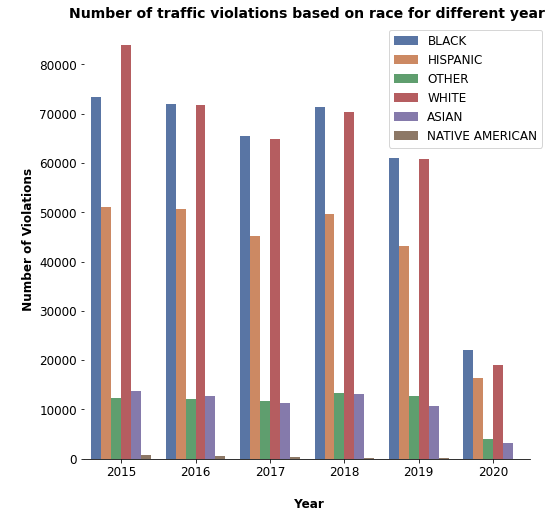

In [23]:
plt.figure(figsize=(8,8))
ax=sns.countplot('year', hue="Race",
              palette="deep", data=traffic_final)
plt.title("Number of traffic violations based on race for different year",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
sns.despine(top=True, right=True, left=True, bottom=False)
#adding the text labels#
#rects = ax.patches
#labels = traffic_final_2019.iloc[:,2:].sum().values
#for rect, label in zip(rects, labels):
#    height = rect.get_height()
#    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
#plt.savefig('images/violationper_raceperyear.jpg')

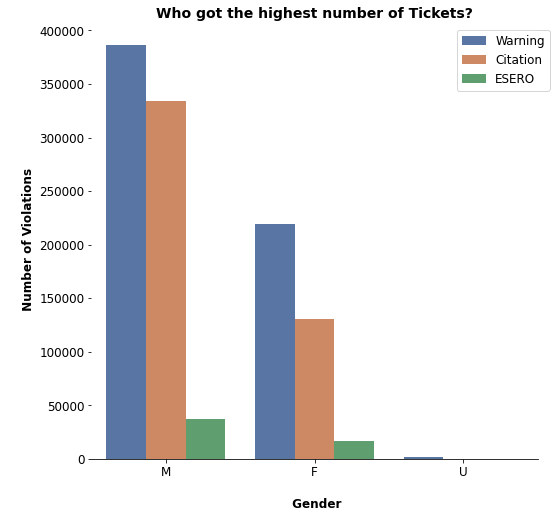

In [24]:
plt.figure(figsize=(8,8))
ax=sns.countplot('Gender', hue="ViolationType",
              palette="deep", data=traffic_final)

plt.title("Who got the highest number of Tickets?",fontsize=14,fontweight="bold")
plt.xlabel("\n Gender", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

## Question 3 : Which color of the vehicle have the highest number of violations and did they contribute to accident?

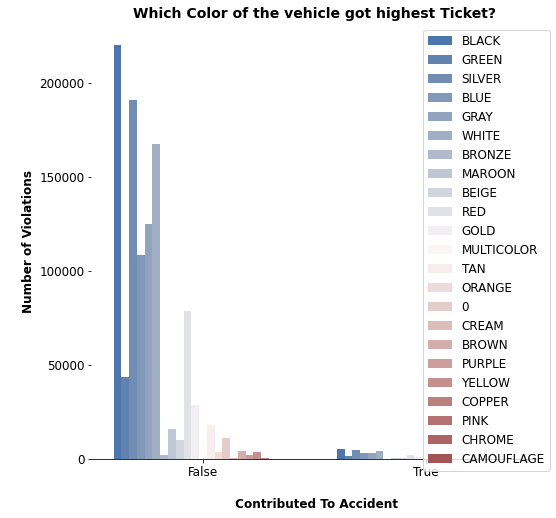

In [25]:
plt.figure(figsize=(8,8))
ax=sns.countplot('ContributedToAccident', hue="Color",
              palette="vlag", data=traffic_final_2019)

plt.title("Which Color of the vehicle got highest Ticket?",fontsize=14,fontweight="bold")
plt.xlabel("\n Contributed To Accident", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\nNumber of Violations", fontsize=12, fontweight="bold")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', bbox_to_anchor=(1.04, 1), loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
#plt.savefig('Total_Violation_and_type_of_vehicle_involved.jpg')
plt.show()

Most of the black colored cars involved in traffic violation but the contribution to accident is less.

# Machine Learning Model -Traffic Violation<a class="anchor" id="sec2a"></a> 

# <font color='blue'> Binomial Classification </font>
*   ### <font color='green'>Can we predict drivers that are male with a Machine Learning model?
*   ### <font color='green'>Can we predict whether traffic violation contributed accident or not?
*   ### <font color='green'>Can we predict *Personal Injury* from the Traffic Violation Data ?

Here for each prediction different data frames with with corresponding target variable and features are defined. 

### Test and Train Data

For the performance of the model the data is split into the test data and train data. The data is split using the *train_test_split.* The data here is split in the ratio 70:30.

For the model prediction the logistic regression function is implemented by importing the logistic regression model in the sklearn module.

The model is then fit on the train set using the fit function. After this the prediction is performed using the prediction function.

Finally accuracy score is detemined and compared with the confusin matrix.

In [27]:
traffic_ML_2019 = traffic_final_2019.copy()
traffic_ML_2020 = traffic_final_2020.copy()

In [28]:
# Create a DataFrame of female drivers
female_2020 = traffic_ML_2020[traffic_final_2020.Gender == 'F']

# Create a DataFrame of male drivers
male_2020 = traffic_ML_2020[traffic_final_2020.Gender == 'M']

# Create a DataFrame of female drivers
female_2019 = traffic_ML_2019[traffic_final_2019.Gender == 'F']

# Create a DataFrame of male drivers
male_2019 = traffic_ML_2019[traffic_final_2019.Gender == 'M']

# Compute the violation types by female drivers (as proportions)
print("Violation Type for females in the year 2020:\n", female_2020.ViolationType.value_counts())

print('-------------------------------')

# Compute the violation types by male drivers (as proportions)
print("Violation Type for males in the year 2020:\n", male_2020.ViolationType.value_counts())
print('-------------------------------')

# Compute the violations by female drivers (as proportions)
print("Violation Type for females from 2015-2019:\n", female_2019.ViolationType.value_counts())

print('-------------------------------')

# Compute the violations by male drivers (as proportions)
print("Violation Type for males from 2015-2019:\n", male_2019.ViolationType.value_counts())

Violation Type for females in the year 2020:
 Warning     12568
Citation     6691
ESERO         570
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for males in the year 2020:
 Warning     22912
Citation    20481
ESERO        1435
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for females from 2015-2019:
 Warning     206902
Citation    123985
ESERO        15734
Name: ViolationType, dtype: int64
-------------------------------
Violation Type for males from 2015-2019:
 Warning     363836
Citation    313890
ESERO        35408
Name: ViolationType, dtype: int64


In [29]:
count_male_2019 = len(traffic_ML_2019[traffic_final_2019['Gender']=='M'])
count_female_2019 = len(traffic_ML_2019[traffic_final_2019['Gender']=='F'])
perc_of_male_2019 = count_male_2019/(count_male_2019+count_female_2019)
print("percentage of male from 2015-2019 :", perc_of_male_2019*100)
perc_of_female_2019 = count_female_2019/(count_male_2019+count_female_2019)
print("percentage of female from 2015-2019 :", perc_of_female_2019*100)
print("........................................................................")
count_male_2020 = len(traffic_final_2020[traffic_final_2020['Gender']=='M'])
count_female_2020 = len(traffic_final_2020[traffic_final_2020['Gender']=='F'])
perc_of_male_2020 = count_male_2020/(count_male_2020+count_female_2020)
print("percentage of male in the year 2020 :", perc_of_male_2020*100)
perc_of_female_2020 = count_female_2020/(count_male_2020+count_female_2020)
print("percentage of female in the year 2020 :", perc_of_female_2020*100)

percentage of male from 2015-2019 : 67.29234587239503
percentage of female from 2015-2019 : 32.70765412760496
........................................................................
percentage of male in the year 2020 : 69.33201354841702
percentage of female in the year 2020 : 30.66798645158297


We observe hear that classes are imbalanced. Ratio of male to female instances is 67:32 (from 2015-2019). It is interesting to note that percentage of male increased in the year 2020 and decreased for female.

In [30]:
traffic_ML_2019_Gender=traffic_ML_2019[['ViolationType', 'Race', 'Color', 'VehicleType','Gender']]
traffic_ML_2019_Gender['Gender'] = np.where(traffic_ML_2019_Gender['Gender'].str.contains('M'), 1, 0)

traffic_ML_2020_Gender=traffic_ML_2020[['ViolationType', 'Race', 'Color', 'VehicleType','Gender']]
traffic_ML_2020_Gender['Gender'] = np.where(traffic_ML_2020_Gender['Gender'].str.contains('M'), 1, 0)

In [31]:
traffic_ML_2019_Gender.head()

ViolationType      Race   Color      VehicleType  Gender
0       Warning     BLACK   BLACK  02 - Automobile       1
1      Citation  HISPANIC   BLACK  02 - Automobile       1
2       Warning     OTHER   GREEN  02 - Automobile       0
3      Citation     WHITE  SILVER  02 - Automobile       1
4      Citation     BLACK    BLUE  02 - Automobile       1

In [32]:
# Split the data into a training and test set.
features_gender_2019=pd.get_dummies(traffic_ML_2019_Gender.drop('Gender',axis=1))
target_gender_2019 =np.array(traffic_ML_2019_Gender['Gender'])
X_train_g2019, X_test_g2019, y_train_g2019, y_test_g2019 = train_test_split(features_gender_2019,target_gender_2019 
                                             ,test_size=0.30, random_state=99)

features_gender_2020=pd.get_dummies(traffic_ML_2020_Gender.drop('Gender' ,axis=1))
target_gender_2020 =np.array(traffic_ML_2020_Gender['Gender'])
X_train_g2020, X_test_g2020, y_train_g2020, y_test_g2020 = train_test_split(features_gender_2020,target_gender_2020 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_g2019, y_train_g2019)
y_pred_g2019 = logmodel.predict(X_test_g2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_g2019 = logmodel.predict_proba(X_test_g2019)[::,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score  from 2015-2019:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_g2019, y_pred_g2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model  from 2015-2019:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_g2019, y_train_g2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_g2019,y_pred_g2019))
################################################################################################################
logmodel.fit(X_train_g2020, y_train_g2020)
y_pred_g2020 = logmodel.predict(X_test_g2020)
print(colored("Accuracy score using meterics accuracy score for the year 2020:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_g2020, y_pred_g2020)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model for the year 2020:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_g2020, y_train_g2020) * 100))
print('\n Classification Report for the year 2020 is :\n', classification_report(y_test_g2020,y_pred_g2020))

Accuracy score using meterics accuracy score  from 2015-2019:

Accuracy  67.13%
.............................................................

Accuracy score using logistic regression model  from 2015-2019:

Score of our model is 67.26%

 Classification Report is :
               precision    recall  f1-score   support

           0       0.52      0.01      0.02    104711
           1       0.67      1.00      0.80    213645

    accuracy                           0.67    318356
   macro avg       0.60      0.50      0.41    318356
weighted avg       0.62      0.67      0.54    318356

Accuracy score using meterics accuracy score for the year 2020:

Accuracy  69.04%
.............................................................

Accuracy score using logistic regression model for the year 2020:

Score of our model is 69.15%

 Classification Report for the year 2020 is :
               precision    recall  f1-score   support

           0       0.52      0.01      0.02      6031
        

The classification report displays the **Precision, Recall , F1  and Support** scores for the model. 

**Precision**: determines the accuracy of positive predictions which is 69 %.

**Recall:** determines the fraction of positives that were correctly identified which is 100%.

**F1 Score:** is a weighted harmonic mean of precision and recall with the best score of 1 and the worst score of 0. F1 score conveys the balance between the precision and the recall. **F1 score for male is 0.82 and for female is 0.02.**

The classification report revealed that the micro average of F1 score is about 0.42, which indicates that the trained model has a classification strength of 42%.

### Classification Accuracy

In [33]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_g2019, y_pred_g2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_g2019, y_pred_g2019))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_g2019, y_pred_g2019))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_g2019, y_pred_g2019)))

Accuracy: 0.6713145032605008
Precision: 0.6721466292702648
Recall: 0.9960776053733998
F1 Score: 0.8026621254382342


### Confusion matrix and ROC Curve

Confusion matrix is a table which describes the performance of a prediction model. A confusion matrix contains the actual values and predicted values. we can use these values to calculate the accuracy score of the model.

Confusion matrix

 [[   910 103801]
 [   838 212807]]

True Positives(TP) =  910

True Negatives(TN) =  212807

False Positives(FP) =  103801

False Negatives(FN) =  838


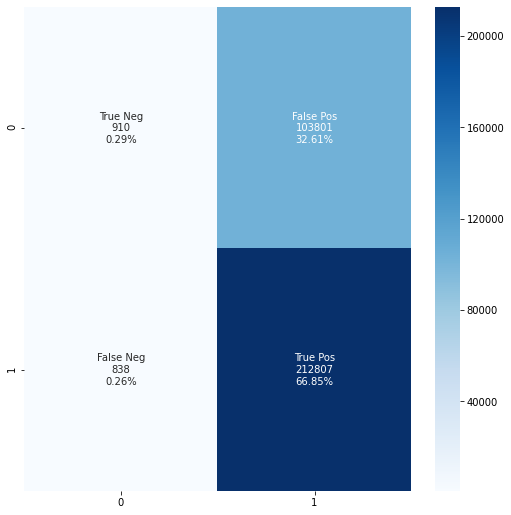

In [34]:
cnf_matrix_g_2019 = metrics.confusion_matrix(y_test_g2019,y_pred_g2019)
#cnf_matrix_g_2019
print('Confusion matrix\n\n', cnf_matrix_g_2019)

print('\nTrue Positives(TP) = ', cnf_matrix_g_2019[0,0])

print('\nTrue Negatives(TN) = ', cnf_matrix_g_2019[1,1])

print('\nFalse Positives(FP) = ', cnf_matrix_g_2019[0,1])

print('\nFalse Negatives(FN) = ', cnf_matrix_g_2019[1,0])
#################################################################################################################
fig, ax = plt.subplots(figsize=(8,8))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_g_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_g_2019.flatten()/np.sum(cnf_matrix_g_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_g_2019, annot=labels, fmt='', cmap='Blues')
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)

The confusion matrix shows 786 + 213380 = 2,14,166 correct predictions and 103468 + 722 = 104,190 incorrect predictions.

**TP / True Positive:** when an actual observation was positive and the model prediction is also positive.

**TN / True Negative:** when an actual observation was negative and the model prediction is also negative.

**FP / False Positive:** when an actual observation was negative but the model prediction is positive.

**FN / False Negative:** when an actual observation was positive but the model prediction is negative.

### ROC Curve


 Confusion Matrix and ROC Curve:



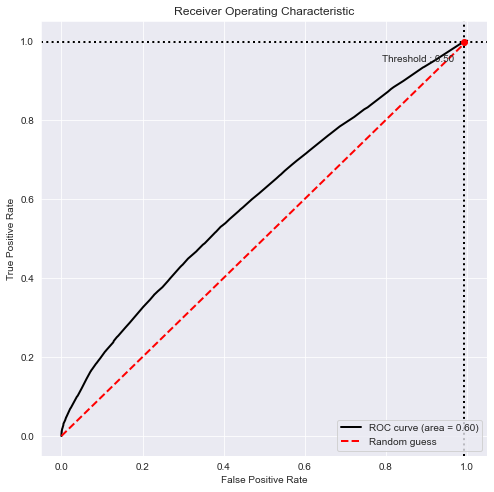

In [35]:
#################################################################################################################
# Visualisation with plot_metric
print(colored('\n Confusion Matrix and ROC Curve:\n', 'green', attrs=['bold']))
bc_g_2019 = BinaryClassification(y_test_g2019, y_pred_prob_g2019, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc_g_2019.plot_roc_curve()
plt.show()

AUC score for the case is 0.60. AUC score 1 represents perfect classifier, and 0.6 is not very good classifier. 

###### When AUC is approximately 0.5, model has no discrimination capacity to distinguish between positive class and negative class. 

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

### Comparison with other Classifier

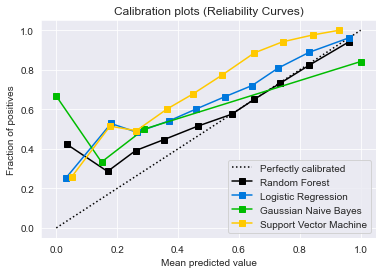

In [36]:
#Comparison with other Classifier
rf = RandomForestClassifier()
lr = LogisticRegression()
nb = GaussianNB()
svm = LinearSVC()
rf_probas = rf.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
lr_probas = lr.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
nb_probas = nb.fit(X_train_g2019, y_train_g2019).predict_proba(X_test_g2019)
svm_scores = svm.fit(X_train_g2019, y_train_g2019).decision_function(X_test_g2019)
probas_list = [rf_probas, lr_probas, nb_probas, svm_scores]
clf_names = ['Random Forest', 'Logistic Regression',
             'Gaussian Naive Bayes', 'Support Vector Machine']
skplt.metrics.plot_calibration_curve(y_test_g2019,
                                      probas_list,
                                      clf_names)
plt.show()

###  <font color='green'> Can we predict whether traffic violation contributed accident or not? </font>

In [37]:
traffic_ML_2019_CL =traffic_ML_2019.copy()
traffic_ML_2019_CL.ContributedToAccident[traffic_ML_2019_CL.ContributedToAccident == 'True'] = 1
traffic_ML_2019_CL.ContributedToAccident[traffic_ML_2019_CL.ContributedToAccident == 'False'] = 0 
traffic_ML_2019_CL.ContributedToAccident =  traffic_ML_2019_CL.ContributedToAccident.astype("float").astype("int")

features_ca_2019=traffic_ML_2019_CL.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','Rush_time'],axis=1)
target_ca_2019 =np.array(traffic_ML_2019_CL['ContributedToAccident'])

X_train_ca2019, X_test_ca2019, y_train_ca2019, y_test_ca2019 = train_test_split(features_ca_2019,target_ca_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_ca2019, y_train_ca2019)
y_pred_ca2019 = logmodel.predict(X_test_ca2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_ca2019 = logmodel.predict_proba(X_test_ca2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_ca2019, y_pred_ca2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_ca2019, y_train_ca2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_ca2019,y_pred_ca2019))

Accuracy score using meterics accuracy score:

Accuracy  100.00%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 100.00%

 Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    310667
           1       1.00      1.00      1.00      7689

    accuracy                           1.00    318356
   macro avg       1.00      1.00      1.00    318356
weighted avg       1.00      1.00      1.00    318356



Here **Precision** and **Recall:** is 100%. Further F1 score for Contributed to Accident and not Contributed to ascciden

The classification report revealed that the micro average of F1 score is 1, which indicates that the trained model has a classification strength of 100%.

### Classification Accuracy

In [38]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_ca2019, y_pred_ca2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_ca2019, y_pred_ca2019))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_ca2019, y_pred_ca2019))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_ca2019, y_pred_ca2019)))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


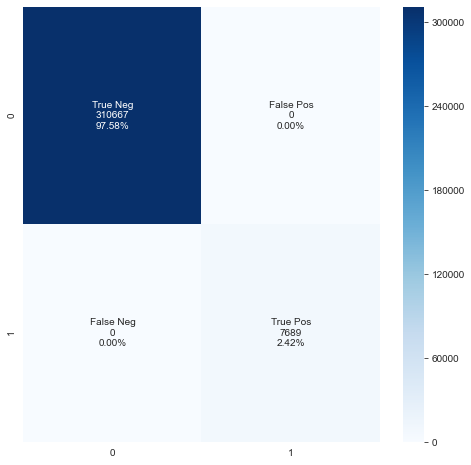

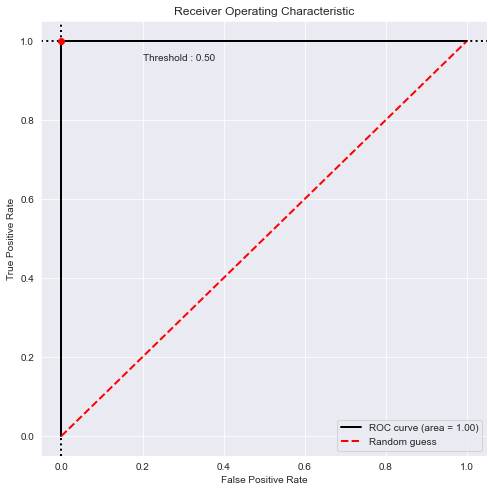

In [39]:
### Confusion matrix and ROC Curve

cnf_matrix_ca_2019 = metrics.confusion_matrix(y_test_ca2019,y_pred_ca2019)
#cnf_matrix_ca_2019

fig, ax = plt.subplots(figsize=(8,8)) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_ca_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_ca_2019.flatten()/np.sum(cnf_matrix_ca_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_ca_2019, annot=labels, fmt='', cmap='Blues')
#################################################################################################################
# Visualisation with plot_metric
bc_ca_2019 = BinaryClassification(y_test_ca2019, y_pred_prob_ca2019 , labels=["0", "1"])
# Figures
plt.figure(figsize=(8,8))
bc_ca_2019.plot_roc_curve()
plt.show()


<font color='maroon'> **AUC score 1 represents perfect classifier !!! </font>**

###  <font color='green'> Can we predict Personal Injury caused by Traffic Violation? </font>

In [40]:
# Split the data into a training and test set.
features_pi_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','PersonalInjury','Rush_time'],axis=1)
target_pi_2019 =np.array(traffic_ML_2019['PersonalInjury'])
X_train_pi2019, X_test_pi2019, y_train_pi2019, y_test_pi2019 = train_test_split(features_pi_2019,target_pi_2019 
                                             ,test_size=0.20, random_state=99)
################################################################################################################
#Fit the model using logistic regression
logmodel=LogisticRegression()
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
logmodel.fit(X_train_pi2019, y_train_pi2019)
y_pred_pi2019 = logmodel.predict(X_test_pi2019)
# Compute predicted probabilities: y_pred_prob
y_pred_prob_pi2019 = logmodel.predict_proba(X_test_pi2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_pi2019, y_pred_pi2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (logmodel.score(X_train_pi2019, y_train_pi2019) * 100))
print(".............................................................\n")
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_ca2019,y_pred_ca2019))

Accuracy score using meterics accuracy score:

Accuracy  98.95%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 98.96%
.............................................................


 Classification Report is :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    310667
           1       1.00      1.00      1.00      7689

    accuracy                           1.00    318356
   macro avg       1.00      1.00      1.00    318356
weighted avg       1.00      1.00      1.00    318356



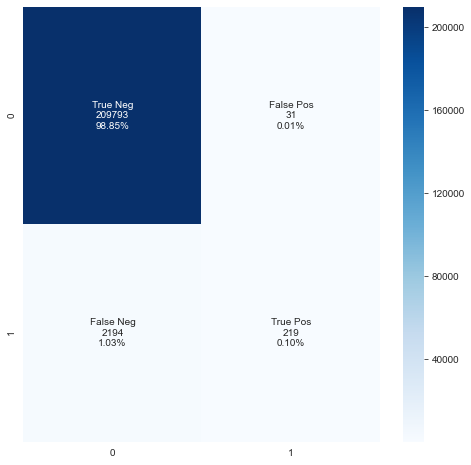

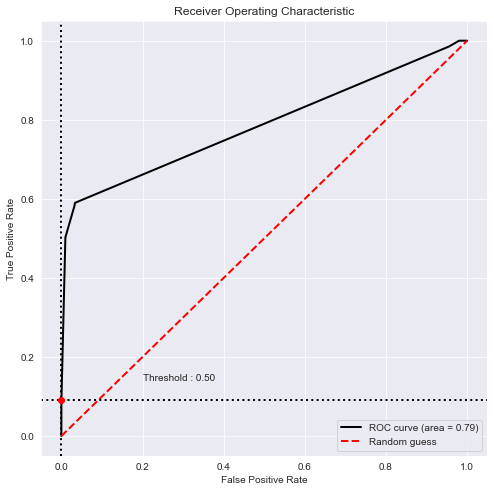

In [41]:
#Confusion Matrix
cnf_matrix_pi_2019 = metrics.confusion_matrix(y_test_pi2019,y_pred_pi2019)
#cnf_matrix_pi_2019
fig, ax = plt.subplots(figsize=(8,8)) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_pi_2019.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_pi_2019.flatten()/np.sum(cnf_matrix_pi_2019)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_pi_2019, annot=labels, fmt='', cmap='Blues')
#plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
#################################################################################################################

# Visualisation with plot_metric
bc_pi_2019  = BinaryClassification(y_test_pi2019, y_pred_prob_pi2019, labels=["Class 0", "Class 1"])
# Figures
plt.figure(figsize=(8,8))
bc_pi_2019.plot_roc_curve()
plt.show()

Here AUC score for the case is 0.80 and which is good classifier. Since ROC AUC of our model approaches towards 1, our classifier does a good job in predicting Personal Injury.

# <font color='blue'> Multinomial Classification </font>
*   ### <font color='green'>Can we predict Violation Type?
*   ### <font color='green'>Can we predict Vehicle Type?

### Can we predict Violation Type?

In [42]:
# Split the data into a training and test set.
features_vt_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','Rush_time'],axis=1)
target_vt_2019 =np.array(traffic_ML_2019['ViolationType'])
X_train_vt2019, X_test_vt2019, y_train_vt2019, y_test_vt2019 = train_test_split(features_vt_2019,target_vt_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
mult_logmodel = LogisticRegression(solver='lbfgs',multi_class='auto')
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
mult_logmodel.fit(X_train_vt2019, y_train_vt2019)
y_pred_vt2019 = mult_logmodel.predict(X_test_vt2019)
y_pred_prob_vt2019 = mult_logmodel.predict_proba(X_test_vt2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_vt2019, y_pred_vt2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (mult_logmodel.score(X_train_vt2019, y_train_vt2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_vt2019,y_pred_vt2019))

Accuracy score using meterics accuracy score:

Accuracy  57.58%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 57.58%

 Classification Report is :
               precision    recall  f1-score   support

    Citation       0.77      0.12      0.21    131117
       ESERO       0.00      0.00      0.00     15507
     Warning       0.56      0.98      0.71    171732

    accuracy                           0.58    318356
   macro avg       0.45      0.37      0.31    318356
weighted avg       0.62      0.58      0.47    318356



### Classification Accuracy

In [43]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_vt2019, y_pred_vt2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_vt2019, y_pred_vt2019, average='weighted'))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_vt2019, y_pred_vt2019, average='weighted'))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_vt2019, y_pred_vt2019, average='weighted')))

Accuracy: 0.575849049491764
Precision: 0.6221638038616143
Recall: 0.575849049491764
F1 Score: 0.4707663664675174


Since we have multiclass, we need to calculate average precision, recall and F1 scores.

### Confusion Matrix for Multiclass

In [44]:
#Confusion Matrix
cnf_matrix_vt_2019 = metrics.confusion_matrix(y_test_vt2019,y_pred_vt2019)
cnf_matrix_vt_2019

array([[ 15819,      0, 115298],
       [   387,      0,  15120],
       [  4226,      0, 167506]], dtype=int64)

In [45]:
multilabel_confusion_matrix(y_test_vt2019,y_pred_vt2019, labels=["Citation", "ESERO", "Warning"])

array([[[182626,   4613],
        [115298,  15819]],

       [[302849,      0],
        [ 15507,      0]],

       [[ 16206, 130418],
        [  4226, 167506]]], dtype=int64)

The *multilabel_confusion_matrix* calculates class-wise or sample-wise multilabel confusion matrices, and in multiclass tasks, labels are binarized under a one-vs-rest way; while confusion_matrix calculates one confusion matrix for confusion between every two classes.

## Confusion Matrix heat map with and without Normalization for multiclass 

Confusion matrix, without normalization
[[ 15819      0 115298]
 [   387      0  15120]
 [  4226      0 167506]]
Normalized confusion matrix
[[0.12 0.   0.88]
 [0.02 0.   0.98]
 [0.02 0.   0.98]]


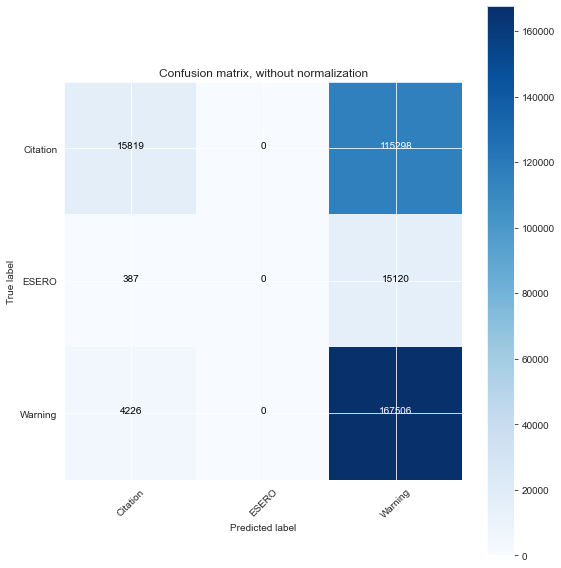

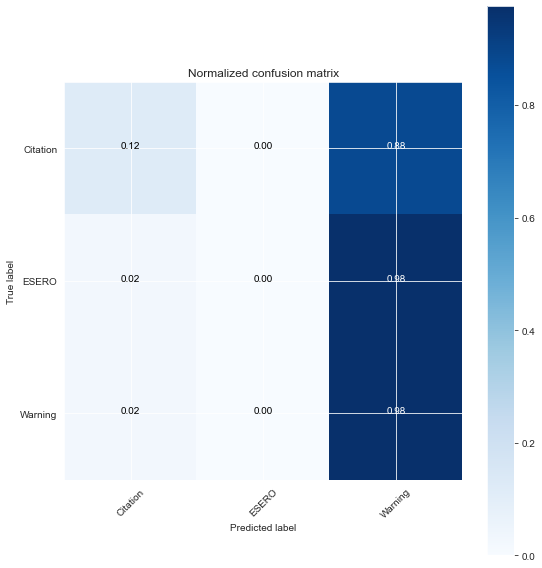

In [46]:
class_names = ['Citation', 'ESERO','Warning' ]
import itertools   
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_vt2019, y_pred_vt2019)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix

plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix_vt_2019, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix_vt_2019, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## <font color='green'> Can we predict Vehicle Type? </font>

In [47]:
# Split the data into a training and test set.
features_V_2019=traffic_ML_2019.drop(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation','VehicleType','Rush_time'],axis=1)
target_V_2019 =np.array(traffic_ML_2019['VehicleType'])
X_train_V2019, X_test_V2019, y_train_V2019, y_test_V2019 = train_test_split(features_V_2019,target_V_2019 
                                             ,test_size=0.30, random_state=99)
################################################################################################################
#Fit the model using logistic regression
mult_logmodel = LogisticRegression(solver='lbfgs',multi_class='auto')
#logmodel=LogisticRegression(solver='liblinear', C=10.0)
## fit the model with data
mult_logmodel.fit(X_train_V2019, y_train_V2019)
y_pred_V2019 = mult_logmodel.predict(X_test_V2019)
y_pred_prob_V2019 = mult_logmodel.predict_proba(X_test_V2019)[:,1]
################################################################################################################
#print accuracy score
print(colored("Accuracy score using meterics accuracy score:\n", attrs=['bold']))
print("Accuracy  %2.2f%%" % (metrics.accuracy_score(y_test_V2019, y_pred_V2019)*100))
print(".............................................................\n")
print(colored("Accuracy score using logistic regression model:\n", attrs=['bold']))
print("Score of our model is %2.2f%%" % (mult_logmodel.score(X_train_V2019, y_train_V2019) * 100))
################################################################################################################
print('\n Classification Report is :\n',classification_report(y_test_V2019,y_pred_V2019))

Accuracy score using meterics accuracy score:

Accuracy  89.87%
.............................................................

Accuracy score using logistic regression model:

Score of our model is 89.84%

 Classification Report is :
                            precision    recall  f1-score   support

          01 - Motorcycle       0.00      0.00      0.00      2705
          02 - Automobile       0.90      1.00      0.95    286104
       03 - Station Wagon       0.00      0.00      0.00      3951
           04 - Limousine       0.00      0.00      0.00       127
    05 - Light Duty Truck       0.00      0.00      0.00     14462
    06 - Heavy Duty Truck       0.00      0.00      0.00      2207
  07 - Truck/Road Tractor       0.00      0.00      0.00       271
08 - Recreational Vehicle       0.00      0.00      0.00       777
        09 - Farm Vehicle       0.00      0.00      0.00        19
         10 - Transit Bus       0.00      0.00      0.00        84
   11 - Cross Country Bus  

### Classification Accuracy

In [48]:
print(colored("Accuracy:",'green', attrs=['bold']),metrics.accuracy_score(y_test_V2019, y_pred_V2019))
print(colored("Precision:",'blue', attrs=['bold']),metrics.precision_score(y_test_V2019, y_pred_V2019, average='weighted'))
print(colored("Recall:",'red', attrs=['bold']),metrics.recall_score(y_test_V2019, y_pred_V2019, average='weighted'))
print(colored("F1 Score: {}",'red', attrs=['bold']).format(f1_score(y_test_V2019, y_pred_V2019, average='weighted')))

Accuracy: 0.8986920303056956
Precision: 0.8076473653349732
Recall: 0.8986920303056956
F1 Score: 0.8507407756959294


In [49]:
### Confusion Matrix for Multiclass

In [50]:
#Confusion Matrix
#cnf_matrix_V_2019 = metrics.confusion_matrix(y_test_V2019,y_pred_V2019)
#cnf_matrix_V_2019
mult_conf_mat_V2019 =multilabel_confusion_matrix(y_test_V2019,y_pred_V2019)
mult_conf_mat_V2019

array([[[315651,      0],
        [  2705,      0]],

       [[     0,  32252],
        [     0, 286104]],

       [[314405,      0],
        [  3951,      0]],

       [[318229,      0],
        [   127,      0]],

       [[303894,      0],
        [ 14462,      0]],

       [[316149,      0],
        [  2207,      0]],

       [[318085,      0],
        [   271,      0]],

       [[317579,      0],
        [   777,      0]],

       [[318337,      0],
        [    19,      0]],

       [[318272,      0],
        [    84,      0]],

       [[318349,      0],
        [     7,      0]],

       [[318286,      0],
        [    70,      0]],

       [[318353,      0],
        [     3,      0]],

       [[318351,      0],
        [     5,      0]],

       [[318350,      0],
        [     6,      0]],

       [[318353,      0],
        [     3,      0]],

       [[318146,      0],
        [   210,      0]],

       [[318191,      0],
        [   165,      0]],

       [[318338,      0],
  

**Conclusion :** Classification accuracy can hide the details about the model. One of the issue is when data does not have even number of classes. Model may achieve 90% accuracy, but this is not a good score as if 90 samples out of 100 belongs to one class and this accuracy can be achieved easily by always predicting most common class.

# Crash Incident Data
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5

# 2a. Crash Reporting – Motorists Data <a class="anchor" id="sec3"></a> 


In [51]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [52]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    #CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    CRI['day'] = CRI['Crash Date/Time'].dt.day_name()
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2015']
    CRI = CRI[CRI.date <'12/02/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [53]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [54]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [55]:
 # Replace all NaN's by 0
#CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new =  CRI_features.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

ReportNumber LocalCaseNumber Agency         ACRSReportType  \
0  MCP11520005        15000008    MCP  Property Damage Crash   
1  MCP2686000D        15000017    MCP  Property Damage Crash   
2  MCP2783000G        15000025    MCP           Injury Crash   
3  MCP2674000D        15000016    MCP  Property Damage Crash   
4  MCP23000002        15000197    MCP  Property Damage Crash   

       CrashDate/Time Hit/Run         RouteType  MilePoint MilePointDirection  \
0 2015-01-01 00:30:00     Yes  Maryland (State)       4.38              North   
1 2015-01-01 01:10:00      No              Ramp       0.15              South   
2 2015-01-01 01:14:00      No  Maryland (State)      25.21               East   
3 2015-01-01 01:26:00      No            County       0.76              North   
4 2015-01-01 02:00:00      No            County       1.81              North   

  LaneDirection  ...  Longitude                     Location  \
0         North  ... -77.102673  (39.02200107, -77.10267305)   
1         South  ... -77.265547     (39.19661, -77.26554667)   
2          East  ... -77.109803  (39.09621667, -77.10980333)   
3          West  ... -77.204349      (39.158059, -77.204349)   
4         North  ... -77.093848      (39.148678, -77.093848)   

                 date  year  month      time hour       day  season crash  
0 2015-01-01 00:30:00  2015      1  00:30:00    0  Thursday  Winter     1  
1 2015-01-01 01:10:00  2015      1  01:10:00    1  Thursday  Winter     1  
2 2015-01-01 01:14:00  2015      1  01:14:00    1  Thursday  Winter     1  
3 2015-01-01 01:26:00  2015      1  01:26:00    1  Thursday  Winter     1  
4 2015-01-01 02:00:00  2015      1  02:00:00    2  Thursday  Winter     1  

[5 rows x 52 columns]

In [56]:
CRI_new['Rush_time']=CRI_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRI(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [57]:
#apply function   
CRI_new['Rush_time']= CRI_new['Rush_time'].apply(rushhour_CRI)

In [58]:
#CRI_final = CRI_new.fillna(method='ffill')
CRI_final = CRI_new.fillna(0)

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [59]:
CRI_is_2020 =CRI_final['year']==2020
CRI_is_2019 = CRI_final['year'] != 2020
#Creating Dataframe only for the year 2020
CRI_final_2020 = CRI_final[CRI_is_2020]
#Data from 2015- 2019
CRI_final_2019 = CRI_final[CRI_is_2019]
print("Size of the original data frame:",CRI_final.shape)
print("Size of the original data frame from 2015-2019:", CRI_final_2019.shape)
print("Size of the original data frame for the year 2020:", CRI_final_2020.shape)

Size of the original data frame: (66480, 53)
Size of the original data frame from 2015-2019: (59200, 53)
Size of the original data frame for the year 2020: (7280, 53)


# 3. Crash Reporting – Non - Motorists Data<a class="anchor" id="sec4"></a> 

In [60]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM= pd.read_csv(url_CRNM,low_memory=False)

In [61]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    #CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    CRNM['day'] = CRNM['Crash Date/Time'].dt.day_name()
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2015']
    CRNM = CRNM[CRNM.date <'12/02/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRNM['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRNM['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRNM['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [62]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [63]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')

In [64]:
 # Replace all NaN's by 0
#CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new =  CRNM_features.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1               NaN           NaN              NaN              NaN   
2               NaN           NaN              NaN              NaN   
3               NaN           NaN              NaN              NaN   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...  Longitude  \
0                                               NaN  ... -77.197752   
1               Parking Lot of 14939 Shady Grove Rd  ... -77.192452   
2             Parking Lot 13 at 11219 Grandview Ave  ... -77.051365   
3  Parking lot of Giant Food (12051 Rockville Pike)  ... -77.087983   
4                                               NaN  ... -77.168492   

                      Location                date  year month      time hour  \
0     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1  18:00:00   18   
1  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1  11:51:00   11   
2  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1  20:31:00   20   
3  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1  14:55:00   14   
4    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1  12:23:00   12   

        day  season crash  
0  Thursday  Winter     1  
1    Friday  Winter     1  
2  Saturday  Winter     1  
3    Sunday  Winter     1  
4    Monday  Winter     1  

[5 rows x 40 columns]

In [65]:
CRNM_new['Rush_time']=CRNM_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRNM(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"


In [66]:
#apply function   
CRNM_new['Rush_time']= CRNM_new['Rush_time'].apply(rushhour_CRNM)
#CRNM_new.head()

In [67]:
CRNM_final = CRNM_new.fillna(0)
CRNM_final.head()

ReportNumber  LocalCaseNumber Agency ACRSReportType      CrashDate/Time  \
0  MCP2439000D         14064779    MCP   Injury Crash 2015-01-01 18:00:00   
1   DD5508000L         15000253    RPD   Injury Crash 2015-01-02 11:51:00   
2  MCP2690000N         15000473    MCP   Injury Crash 2015-01-03 20:31:00   
3  MCP27650015         15000583    MCP   Injury Crash 2015-01-04 14:55:00   
4  MCP9379000G         15000697    MCP   Injury Crash 2015-01-05 12:23:00   

          RouteType      RoadName Cross-StreetType Cross-StreetName  \
0            County    CONTOUR RD           County   HORIZON RUN RD   
1                 0             0                0                0   
2                 0             0                0                0   
3                 0             0                0                0   
4  Maryland (State)  FREDERICK RD     Municipality   KING FARM BLVD   

                                Off-RoadDescription  ...  \
0                                                 0  ...   
1               Parking Lot of 14939 Shady Grove Rd  ...   
2             Parking Lot 13 at 11219 Grandview Ave  ...   
3  Parking lot of Giant Food (12051 Rockville Pike)  ...   
4                                                 0  ...   

                      Location                date  year month      time hour  \
0     (39.1552397, -77.197752) 2015-01-01 18:00:00  2015     1  18:00:00   18   
1  (39.09749501, -77.19245195) 2015-01-02 11:51:00  2015     1  11:51:00   11   
2  (39.03882591, -77.05136508) 2015-01-03 20:31:00  2015     1  20:31:00   20   
3  (38.96282667, -77.08798333) 2015-01-04 14:55:00  2015     1  14:55:00   14   
4    (39.116905, -77.16849167) 2015-01-05 12:23:00  2015     1  12:23:00   12   

        day  season crash   Rush_time  
0  Thursday  Winter     1     Evening  
1    Friday  Winter     1         Day  
2  Saturday  Winter     1     Evening  
3    Sunday  Winter     1   Afternoon  
4    Monday  Winter     1  Lunch Rush  

[5 rows x 41 columns]

**Here onwards, I splitted entire data frame into two new data frames. One data is from 2015-2019 and another for the year 2020.** 

In [68]:
CRNM_is_2020 =CRNM_final['year']==2020
CRNM_is_2019 = CRNM_final['year'] != 2020
#Creating Dataframe only for the year 2020
CRNM_final_2020 = CRNM_final[CRNM_is_2020]
#Data from 2015- 2019
CRNM_final_2019 = CRNM_final[CRNM_is_2019]
print("Size of the original data frame:",CRNM_final.shape)
print("Size of the original data frame from 2015-2019:", CRNM_final_2019.shape)
print("Size of the original data frame for the year 2020:", CRNM_final_2020.shape)

Size of the original data frame: (3839, 41)
Size of the original data frame from 2015-2019: (3347, 41)
Size of the original data frame for the year 2020: (492, 41)


# Exploratory Data Analysis and Visualization (Motorists and Non-Motorists)<a class="anchor" id="sec5"></a> 

## Questions to Research 

### Question 1 : How does number of crashes change over year, month and season? Which month has the highest number of violations? Are they consistent?

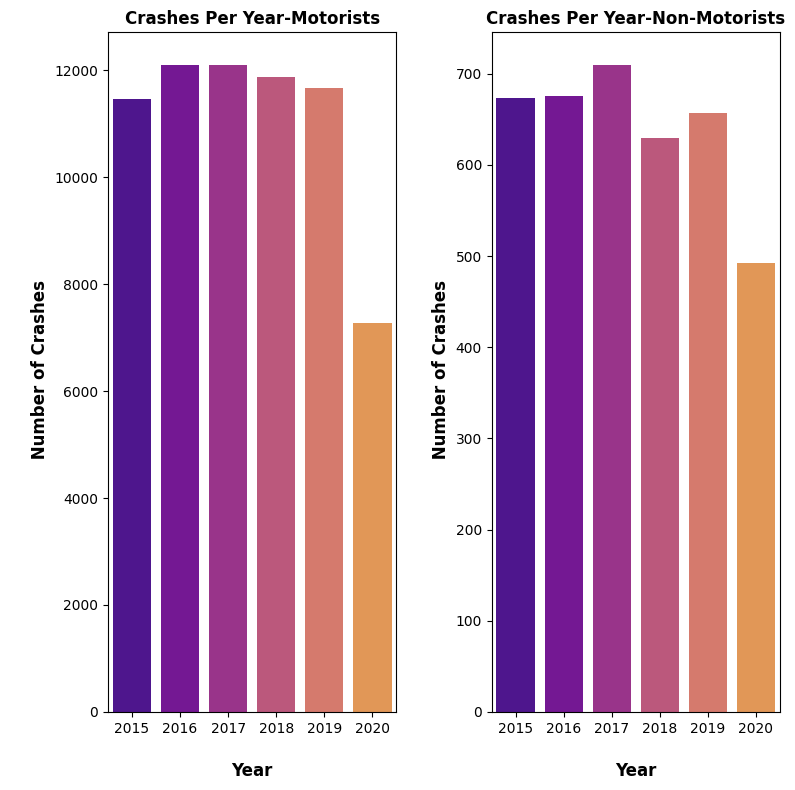

In [110]:
crashperyear_CRI = CRI_final.groupby(['year'])['crash'].count()
crashperyear_CRNM = CRNM_final.groupby(['year'])['crash'].count()
# sns barplot
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(crashperyear_CRI.index,crashperyear_CRI.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Year-Motorists",fontsize=12, fontweight="bold")
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(crashperyear_CRNM.index,crashperyear_CRNM.values, palette=colors)
#sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Year-Non-Motorists",fontsize=12, fontweight="bold")
plt.subplots_adjust(left=0.11, bottom=0.1, right=1, top=0.2, wspace=1, hspace=1)
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/crashperyear.jpg')
plt.tight_layout()

Minor variations on a yearly basis is expected. A significant drop in the number of violation in 2020 can be attributed to decrease in traffic due to the pandemic.

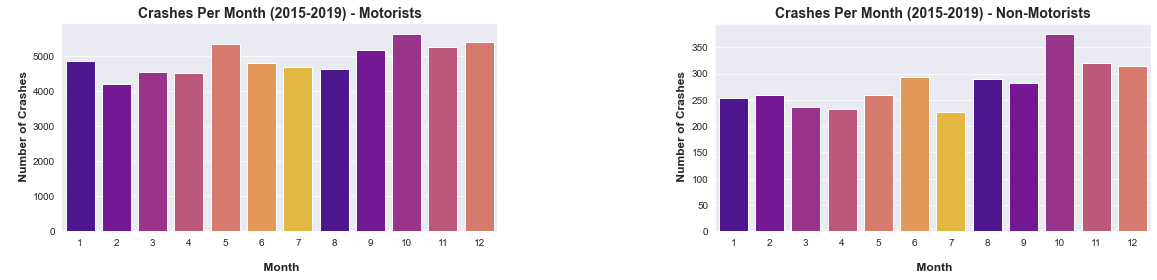

In [70]:
crashpermonth_CRI = CRI_final_2019.groupby(['month'])['crash'].count()
crashpermonth_CRNM = CRNM_final_2019.groupby(['month'])['crash'].count()
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(crashpermonth_CRI.index,crashpermonth_CRI.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Month (2015-2019) - Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(crashpermonth_CRNM.index,crashpermonth_CRNM.values, palette=colors)
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.title("Crashes Per Month (2015-2019) - Non-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Month", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/crashpermonth.jpg')

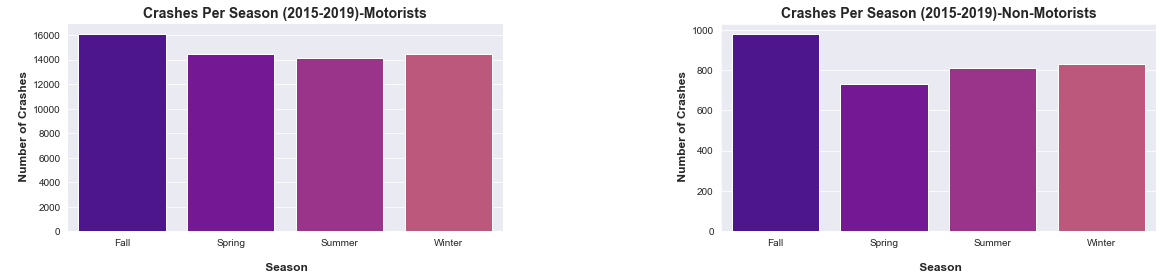

In [71]:
crashperseason_CRI = CRI_final_2019.groupby(['season'])['crash'].count()
crashperseason_CRNM = CRNM_final_2019.groupby(['season'])['crash'].count()
plt.figure(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.barplot(crashperseason_CRI.index,crashperseason_CRI.values, palette=colors)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Crashes Per Season (2015-2019)-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.subplot(1, 2, 2)
sns.barplot(crashperseason_CRNM.index,crashperseason_CRNM.values, palette=colors)
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.title("Crashes Per Season (2015-2019)-Non-Motorists",fontsize=14,fontweight="bold")
plt.xlabel("\n Season", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.savefig('images/crashperseason.jpg')

Here Fall Season has highest number of crashes in both the cases.

## Question 2 : What days of the week had the highest number of violations and how do they change over the years?

To answer this, heatmap visualization is used.

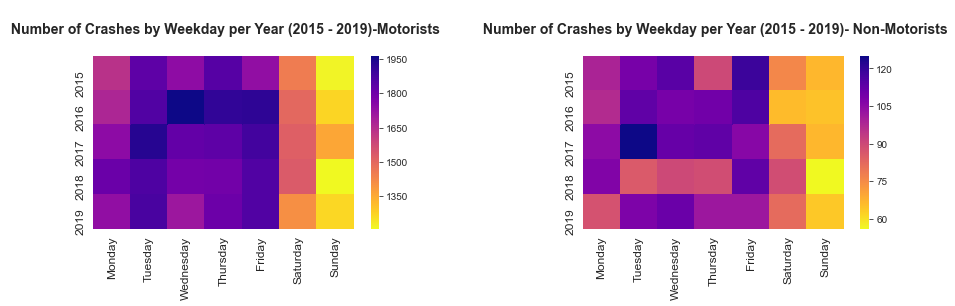

In [72]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
crashweekday_CRI = CRI_final_2019.groupby(['year', 'day']).size()
crashweekday_CRNM = CRNM_final_2019.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
crashweekday_CRI = crashweekday_CRI.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
crashweekday_CRNM = crashweekday_CRNM.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
#plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.heatmap(crashweekday_CRI, cmap='plasma_r')
plt.title('\n Number of Crashes by Weekday per Year (2015 - 2019)-Motorists\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.subplot(1, 2, 2)
sns.heatmap(crashweekday_CRNM, cmap='plasma_r')
plt.title('\n Number of Crashes by Weekday per Year (2015 - 2019)- Non-Motorists\n', fontsize=14, fontweight='bold')
plt.subplots_adjust(left=0.11, bottom=0.1, right=2, top=0.7, wspace=0.5, hspace=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/crashbyweekdayperyear.jpg')
plt.show()

Other than Weekend, Incident of crashes almost equally distributed in the weekdays!

### Rush-hour Traffic -Motorists

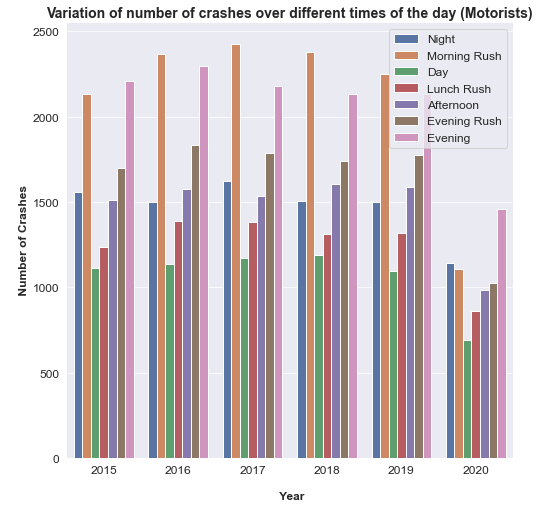

In [73]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(8,8))
ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=CRI_final)
plt.title("Variation of number of crashes over different times of the day (Motorists)",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)

plt.savefig('images/crash_rushtime_year_CRI.jpg')

The maximum number of crashes is during Morning Rush.

### Rush-hour Traffic - Non-Motorists

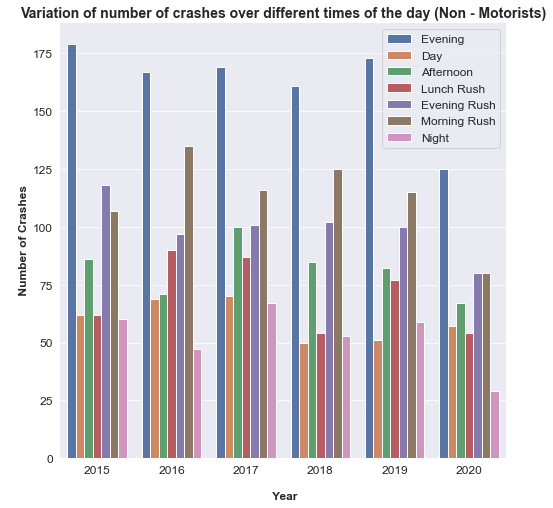

In [74]:
#"Morning Rush (6-10)", "Day (10-12)", "Lunch Rush (12-14)","Afternoon (14-16)",
#"Evening" Rush (16-18)", "Evening (18-22)", "Night (22-6)"

plt.figure(figsize=(8,8))

ax=sns.countplot('year', hue ='Rush_time', 
              palette="deep", data=CRNM_final)
plt.title("Variation of number of crashes over different times of the day (Non - Motorists)",fontsize=14,fontweight="bold")
plt.xlabel("\n Year", fontsize=12, fontweight="bold")
plt.legend().set_title('')
plt.legend(fontsize='12', loc = 'upper right')
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize='12', loc='upper right', ncol=1)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
sns.despine(top=True, right=True, left=True, bottom=False)
plt.savefig('images/crash_rushtime_year_CRNM.jpg')

## Question 3 : What damage was caused due to the crash?


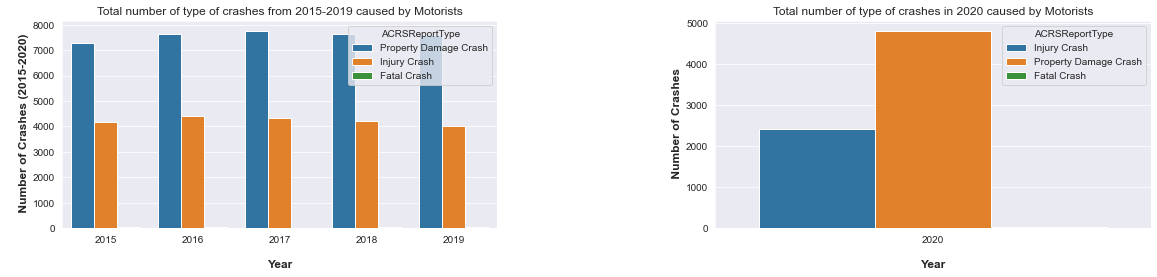

In [75]:
fig = plt.subplots(figsize=(8,8))
colors = sns.color_palette("plasma", n_colors=7)
plt.subplot(1, 2, 1)
sns.countplot('year', hue="ACRSReportType",  data=CRI_final_2019)
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes (2015-2020)", fontsize=12, fontweight="bold")
plt.title('Total number of type of crashes from 2015-2019 caused by Motorists')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="ACRSReportType", data=CRI_final_2020)
plt.title('Total number of type of crashes in 2020 caused by Motorists')
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.savefig('images/CRI_CRNM_crashtype.jpg')


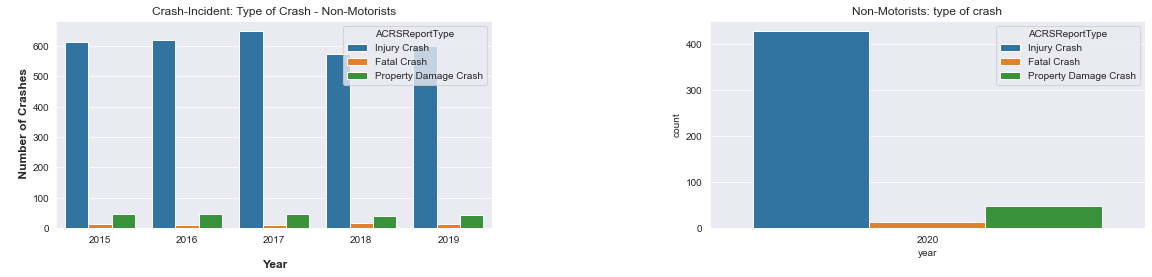

In [76]:
fig = plt.subplots(figsize=(8,8))
colors = sns.color_palette("deep", n_colors=7)
plt.subplot(1, 2, 1)
sns.countplot('year', hue="ACRSReportType",  data=CRNM_final_2019)
plt.xlabel("\nYear", fontsize=12, fontweight="bold")
plt.ylabel("\n Number of Crashes", fontsize=12, fontweight="bold")
plt.title('Crash-Incident: Type of Crash - Non-Motorists')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="ACRSReportType", data=CRNM_final_2020)
plt.title('Non-Motorists: type of crash')
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.savefig('images/CRI_CRNM_crashtype.jpg')


Motorists crashes ended up with large number of property damage where as Injury Crash is more for crashes where non-motorists involved.

## Question 4: What is the weather, surface and light condition when the most crashes occurred?

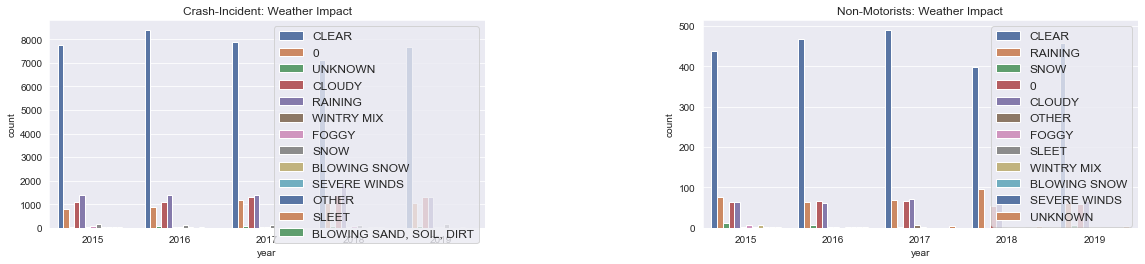

In [77]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="Weather", palette="deep", data=CRI_final_2019)
plt.legend(fontsize='12', loc = 'upper right')
plt.title('Crash-Incident: Weather Impact')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="Weather", palette="deep", data=CRNM_final_2019)
plt.title('Non-Motorists: Weather Impact')
plt.legend(fontsize='12', loc = 'upper right')
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.savefig('images/CRI_CRNM_weather_impact.jpg')

Most of the crashes occured whn weather was clear ! Here 0 represents missing values !

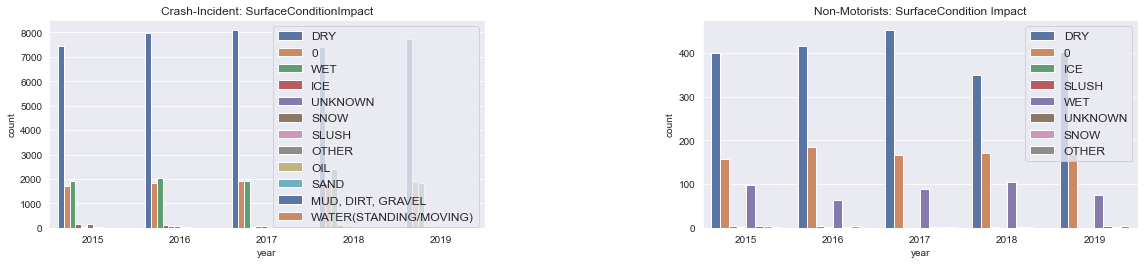

In [78]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="SurfaceCondition", palette="deep", data=CRI_final_2019)
plt.legend(fontsize='12', loc = 'upper right')
plt.title('Crash-Incident: SurfaceConditionImpact')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="SurfaceCondition", palette="deep", data=CRNM_final_2019)
plt.title('Non-Motorists: SurfaceCondition Impact')
plt.legend(fontsize='12', loc = 'upper right')
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.savefig('images/CRI_CRNM_SurfaceCondition_impact.jpg')

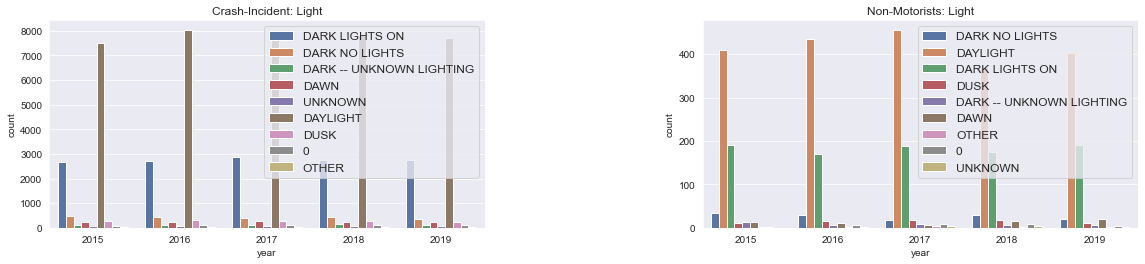

In [79]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
sns.countplot('year', hue="Light", palette="deep", data=CRI_final_2019)
plt.legend(fontsize='12', loc = 'upper right')
plt.title('Crash-Incident: Light')
plt.subplot(1, 2, 2)
sns.countplot('year', hue="Light", palette="deep", data=CRNM_final_2019)
plt.title('Non-Motorists: Light')
plt.legend(fontsize='12', loc = 'upper right')
plt.subplots_adjust(left=0.11, bottom=0.24, right=2, top=0.6, wspace=0.5, hspace=0)
plt.savefig('images/CRI_CRNM_Light_impact.jpg')

With a conclusion, most of the crashes are with clear weather, daylight and dry surface condition !

# <b> Time-Series Analysis and Forecasting Number of Crashes</b> <a class="anchor" id="sec6"></a> 

## Predicting Future Crash related to Mototrists using *Facebook Prophet*

In [80]:
#2015-2020
#Creating a new dataframe for time series analysis with date as an index
CRI_timeseries_2019 = CRI_final_2019.copy()
CRI_timeseries_2019.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRI_timeseries_2019['date'] = pd.to_datetime(CRI_timeseries_2019['date'])
CRI_timeseries_2019 = CRI_timeseries_2019.set_index('date')


#Time series data for the year 2020
CRI_timeseries_2020 = CRI_final_2020.copy()
CRI_timeseries_2020.rename(columns = {'CrashDate/Time':'CrashDate_Time'}, inplace = True) 
CRI_timeseries_2020['date'] = pd.to_datetime(CRI_timeseries_2020['date'])
CRI_timeseries_2020 = CRI_timeseries_2020.set_index('date')
CRI_timeseries_2020.head()

ReportNumber LocalCaseNumber Agency  \
date                                                      
2020-01-01 01:18:00  MCP27200046       200000011    MCP   
2020-01-01 02:35:00  MCP3097001J        20000002    MCP   
2020-01-01 08:17:00  MCP3021004Z       200000041    MCP   
2020-01-01 09:57:00  MCP9428002M       200000044    MCP   
2020-01-01 11:49:00  MCP3211000Q       200000057    MCP   

                            ACRSReportType      CrashDate_Time Hit/Run  \
date                                                                     
2020-01-01 01:18:00           Injury Crash 2020-01-01 01:18:00      No   
2020-01-01 02:35:00  Property Damage Crash 2020-01-01 02:35:00     Yes   
2020-01-01 08:17:00           Injury Crash 2020-01-01 08:17:00      No   
2020-01-01 09:57:00           Injury Crash 2020-01-01 09:57:00      No   
2020-01-01 11:49:00  Property Damage Crash 2020-01-01 11:49:00     Yes   

                            RouteType  MilePoint MilePointDirection  \
date                                                                  
2020-01-01 01:18:00  Maryland (State)      0.210              North   
2020-01-01 02:35:00                 0      0.000                  0   
2020-01-01 08:17:00        US (State)      5.655              North   
2020-01-01 09:57:00            County      1.760               East   
2020-01-01 11:49:00            County      0.120               East   

                    LaneDirection  ...  Longitude  \
date                               ...              
2020-01-01 01:18:00         North  ... -77.050186   
2020-01-01 02:35:00             0  ... -76.981307   
2020-01-01 08:17:00         North  ... -76.978948   
2020-01-01 09:57:00          West  ... -77.258633   
2020-01-01 11:49:00         North  ... -77.120058   

                                        Location  year month      time hour  \
date                                                                          
2020-01-01 01:18:00  (39.06317431, -77.05018556)  2020     1  01:18:00    1   
2020-01-01 02:35:00  (39.04137761, -76.98130678)  2020     1  02:35:00    2   
2020-01-01 08:17:00  (39.05139106, -76.97894797)  2020     1  08:17:00    8   
2020-01-01 09:57:00  (39.23213833, -77.25863333)  2020     1  09:57:00    9   
2020-01-01 11:49:00    (38.96457911, -77.120058)  2020     1  11:49:00   11   

                           day  season crash     Rush_time  
date                                                        
2020-01-01 01:18:00  Wednesday  Winter     1         Night  
2020-01-01 02:35:00  Wednesday  Winter     1         Night  
2020-01-01 08:17:00  Wednesday  Winter     1  Morning Rush  
2020-01-01 09:57:00  Wednesday  Winter     1  Morning Rush  
2020-01-01 11:49:00  Wednesday  Winter     1           Day  

[5 rows x 52 columns]

In [81]:
plt.rcdefaults()
CRI_per_day_2020=CRI_timeseries_2020['crash'].groupby(CRI_timeseries_2020.index.date).sum()
CRI_per_day_2019=CRI_timeseries_2019['crash'].groupby(CRI_timeseries_2019.index.date).sum()

CRI_timeseries_prophet_2019 = pd.DataFrame(CRI_per_day_2019)
CRI_timeseries_prophet_2019 = CRI_timeseries_prophet_2019.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2019['ds'] = CRI_timeseries_prophet_2019.index

CRI_timeseries_prophet_2020 = pd.DataFrame(CRI_per_day_2020)
CRI_timeseries_prophet_2020 = CRI_timeseries_prophet_2020.rename(columns={'crash' : 'y'})
CRI_timeseries_prophet_2020['ds'] = CRI_timeseries_prophet_2020.index

print("Time series data frame 2015-2019:\n",CRI_timeseries_prophet_2019 .head())
print("\n____________________________________________________________________________\n")
print("Time series data frame 2020:\n",CRI_timeseries_prophet_2020 .head())

Time series data frame 2015-2019:
              y          ds
2015-01-01  26  2015-01-01
2015-01-02  22  2015-01-02
2015-01-03  37  2015-01-03
2015-01-04  25  2015-01-04
2015-01-05  25  2015-01-05

____________________________________________________________________________

Time series data frame 2020:
              y          ds
2020-01-01  15  2020-01-01
2020-01-02  32  2020-01-02
2020-01-03  51  2020-01-03
2020-01-04  34  2020-01-04
2020-01-05  22  2020-01-05


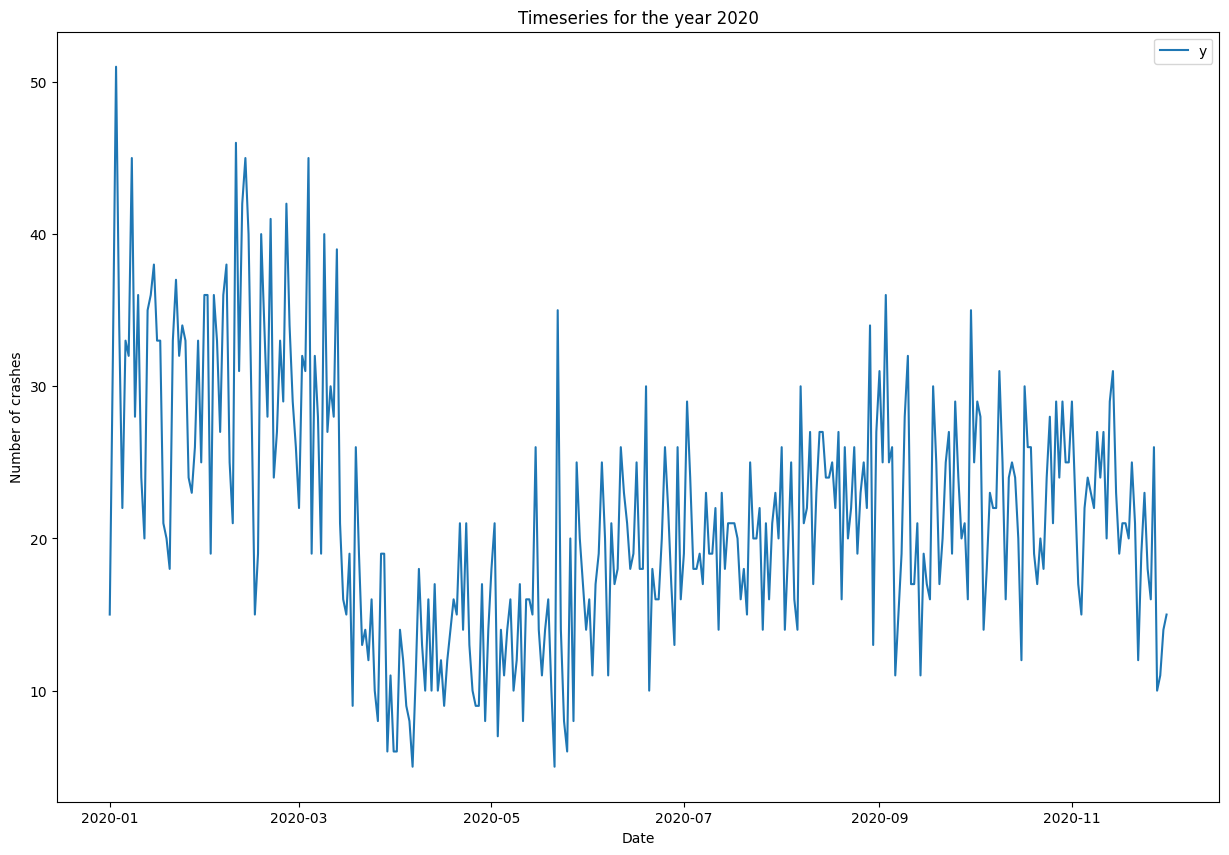

In [82]:
ax = CRI_timeseries_prophet_2020.set_index('ds').plot(figsize=(15, 10))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
#plt.xticks(rotation=45)
plt.title("Timeseries for the year 2020")
#plt.show()
plt.show()

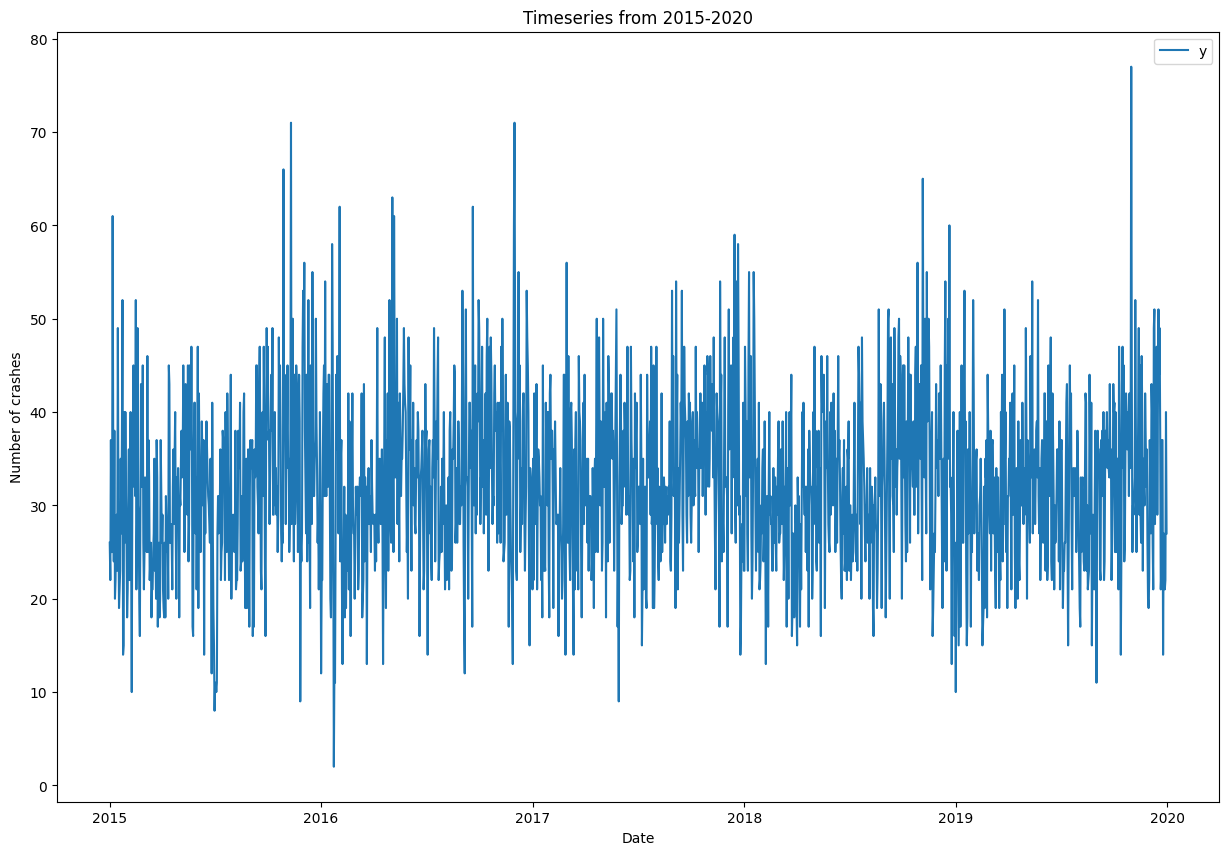

In [83]:
ax = CRI_timeseries_prophet_2019.set_index('ds').plot(figsize=(15, 10))
ax.set_ylabel('Number of crashes')
ax.set_xlabel('Date')
plt.title("Timeseries from 2015-2020")
plt.show()

## Fitting the Prophet Model - Motorists Data

In [84]:
#Set the uncertainty interval to 95% (the Prophet default is 80%)
#from fbprophet import Prophet

CRI_prohet_model_2019 = Prophet(interval_width=0.95,daily_seasonality=True)
CRI_prohet_model_2019.fit(CRI_timeseries_prophet_2019)

CRI_prohet_model_2020 = Prophet(interval_width=0.95,daily_seasonality=True)
CRI_prohet_model_2020.fit(CRI_timeseries_prophet_2020)

future_dates_CRI_2019 = CRI_prohet_model_2019.make_future_dataframe(periods=30, freq='MS') 

future_dates_CRI_2020 = CRI_prohet_model_2020.make_future_dataframe(periods=12, freq='MS') 
#print(future_dates_violation.tail())
#print(future_dates_violation_2019.tail())
#print(future_dates_violation_2020.tail())

forecast_CRI_2019 = CRI_prohet_model_2019.predict(future_dates_CRI_2019)

forecast_CRI_2020 = CRI_prohet_model_2020.predict(future_dates_CRI_2020)

#print(forecast_violation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2019[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#print(forecast_violation_2020[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [85]:
plot_plotly(CRI_prohet_model_2020, forecast_CRI_2020)

In [86]:
plot_plotly(CRI_prohet_model_2019, forecast_CRI_2019)
#plt.title("Timeseries from 2015-2020")

In [87]:
plot_components_plotly(CRI_prohet_model_2020, forecast_CRI_2020)

In [88]:
plot_components_plotly(CRI_prohet_model_2019, forecast_CRI_2019)

# Points of Changes
In the following visualization, change-points have been added (where the trend model is shifting):

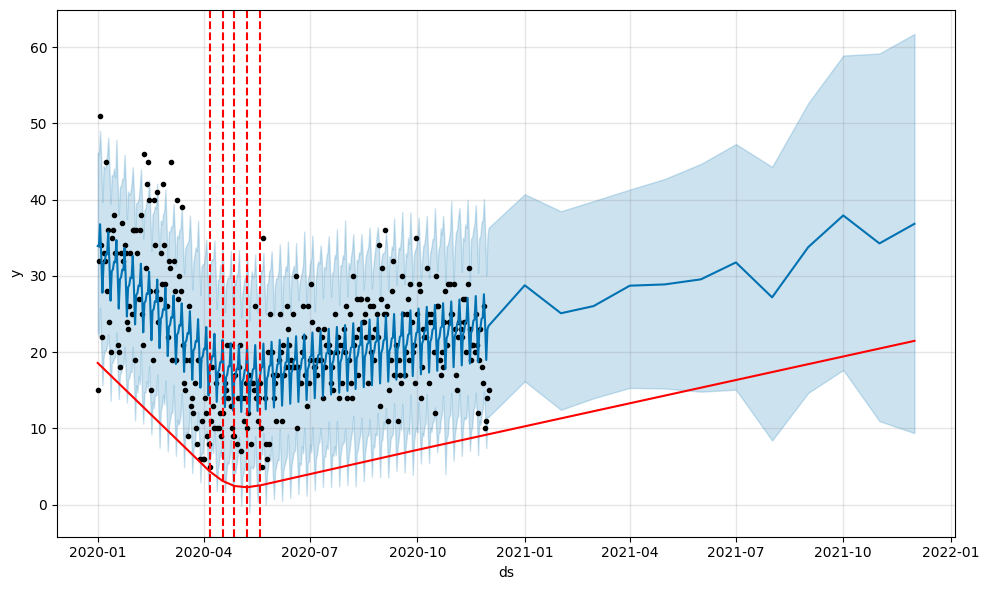

In [89]:
fig_2020=CRI_prohet_model_2020.plot(forecast_CRI_2020)
changes_2020=add_changepoints_to_plot(fig_2020.gca(),CRI_prohet_model_2020,forecast_CRI_2020)

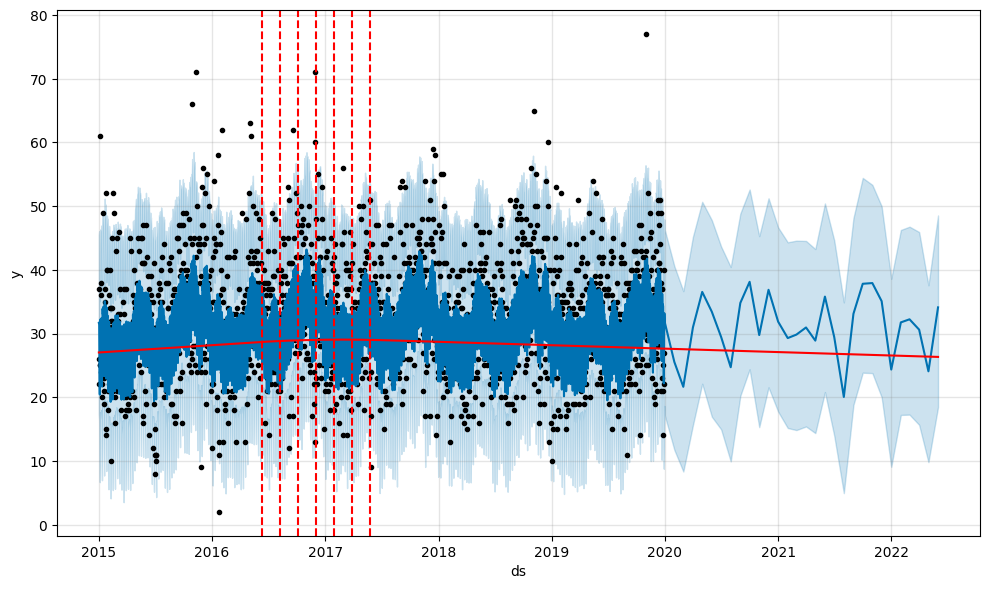

In [90]:
fig_2019=CRI_prohet_model_2019.plot(forecast_CRI_2019)
changes_2019=add_changepoints_to_plot(fig_2019.gca(),CRI_prohet_model_2019,forecast_CRI_2019)

In [91]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=CRI_timeseries_prophet_2019['ds'], y=CRI_timeseries_prophet_2019['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast_CRI_2019['ds'], y=forecast_CRI_2019['yhat'], name='Predicted',))
#fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['holidays'], name='Holidays',))
fig.update_layout(
    title="Actual (2015-2019) Vs Predicted (for 2 and half year)",
    xaxis_title="Date",
    yaxis_title="Number of Crashes",
       font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [92]:
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=CRI_timeseries_prophet_2020['ds'], y=CRI_timeseries_prophet_2020['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast_CRI_2020['ds'], y=forecast_CRI_2020['yhat'], name='Predicted',))
#fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['holidays'], name='Holidays',))
fig.update_layout(
    title="Actual (2020) Vs Predicted (for 1 year)",
    xaxis_title="Date",
    yaxis_title="Number of Crashes",
       font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [93]:
fig= go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=CRI_timeseries_prophet_2020['ds'], y=CRI_timeseries_prophet_2020['y'], name='Actual',))
fig.add_trace(go.Scatter(x=forecast_CRI_2020['ds'], y=forecast_CRI_2020['yhat'], name='Predicted',))
#fig.add_trace(go.Scatter(x=forecast_violation_2020['ds'], y=forecast_violation_2020['holidays'], name='Holidays',))
#fig.title("Actual Vs Predicted")
fig.update_layout(
    title="Actual Vs Predicted",
    xaxis_title="Date",
    yaxis_title="Number of Violations",
       font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

In [94]:
metric_forecast_CRI_2020 = forecast_CRI_2020.set_index('ds')[['yhat']].join(CRI_timeseries_prophet_2020.set_index('ds').y).reset_index()
metric_forecast_CRI_2020.dropna(inplace=True)

metric_forecast_CRI_2019 = forecast_CRI_2019.set_index('ds')[['yhat']].join(CRI_timeseries_prophet_2019.set_index('ds').y).reset_index()
metric_forecast_CRI_2019.dropna(inplace=True)
metric_forecast_CRI_2020.tail()

ds       yhat     y
331 2020-11-27  27.605484  26.0
332 2020-11-28  23.730094  10.0
333 2020-11-29  18.979819  11.0
334 2020-11-30  22.999216  14.0
335 2020-12-01  23.454858  15.0

In [95]:
print("r2 value for the year 2020",r2_score(metric_forecast_CRI_2020.y, metric_forecast_CRI_2020.yhat))

print("r2 value from 2015-2020",r2_score(metric_forecast_CRI_2019.y, metric_forecast_CRI_2019.yhat))

r2 value for the year 2020 0.4241985569047829
r2 value from 2015-2020 0.31326441486311474


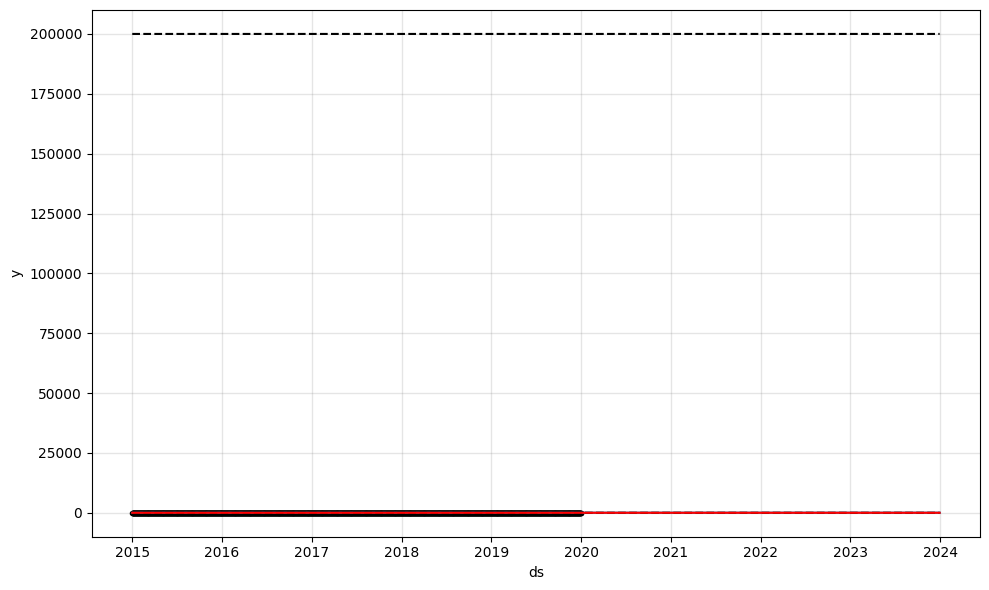

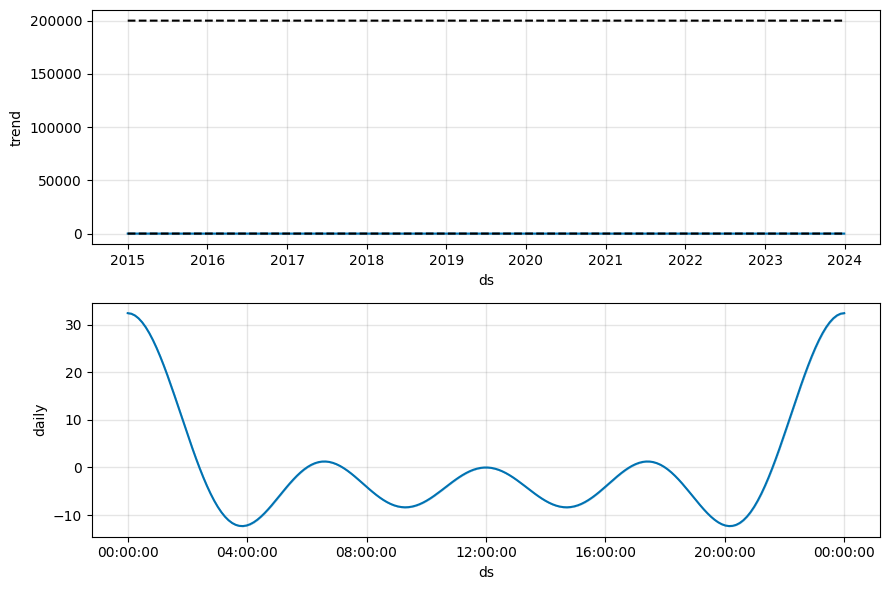

In [96]:
cap = 200000
floor = 0
CRI_timeseries_prophet_2019['cap'] = cap
CRI_timeseries_prophet_2019['floor'] = floor

prophet = Prophet(growth='logistic',
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=True,
                  seasonality_prior_scale=10,
                  changepoint_prior_scale=.01)
#prophet.add_country_holidays(country_name='RU')
prophet.fit(CRI_timeseries_prophet_2019)
future = prophet.make_future_dataframe(periods=1460, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [ ]:
# Mapping Visualization

In [ ]:
# from arcgis.gis import GIS
# from arcgis.features import GeoAccessor, GeoSeriesAccessor
# agol_gis = GIS()
# violations = traffic_final_2019
# violation_by_race = traffic_final_2019.groupby(traffic_final_2019['Race']).size()
# violation_by_race


In [ ]:
# violation_by_race_map=agol_gis.map('Montgomery County, Maryland', zoomlevel=12)
# violation_by_race_map

In [ ]:
# hotspot_map = agol_gis.map('Germantown, Montgomery County, Maryland')
# hotspot_map

In [ ]:
# from mpl_toolkits.basemap import Basemap
# lat = traffic_final_2019['Latitude'].values
# lon =traffic_final_2019['Longitude'].values
# violation = traffic_final_2019['Violation'].values

#  Final Thoughts and Ideas

* Most of the columns in each data sets are categorical with multi-class target variables. As a contunation to this project, multinominal classification to predict modeling could be performed.

* Handling missing values is challenging. If the dataset is updated with missing information, it would be interesting to visualize the data.

* It is interesting to know if there is a relationship between time of day and contributing factor. Why are the number of traffic violations more at night?
 

# Acknowledgment <a class="anchor" id="sec6"></a> 

I would to thank you all my Professors who supported me directly and indirectily through out this Data Science Project.
 
* Dr Iapalucci, Michael J.
* Dr Saidi, Rachel
* Dr Mohamed, Abdirisak
* Dr Hamman, John F.
* Dr Linehan, Kathryn
* Dr Nicholson, Ben

I would also like to thank Datamontgomery Team for the support.